<a href="https://colab.research.google.com/github/Mariana-MarquezA/Education-Inequality/blob/main/Education_Inequality_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Provide a brief introduction to the purpose of this notebook.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

## The data

This project utilizes two data sets. The primary data set is the EdGap data set from [EdGap.org](https://www.edgap.org/#5/37.875/-96.987). This data set from 2016 includes information about average ACT or SAT scores for schools and several socioeconomic characteristics of the school district. The secondary data set is basic information about each school from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp).





### EdGap data

All socioeconomic data (household income, unemployment, adult educational attainment, and family structure) are from the Census Bureau's American Community Survey. 

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) report that ACT and SAT score data is from each state's department of education or some other public data release. The nature of the other public data release is not known.

The quality of the census data and the department of education data can be assumed to be reasonably high. 

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) do not indicate that they processed the data in any way. The data were assembled by the [EdGap.org](https://www.edgap.org/#5/37.875/-96.987) team, so there is always the possibility for human error. Given the public nature of the data, we would be able to consult the original data sources to check the quality of the data if we had any questions.

### School information data

The school information data is from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp). This data set consists of basic identifying information about schools and can be assumed to be of reasonably high quality. As for the EdGap.org data, the school information data is public, so we would be able to consult the original data sources to check the quality of the data if we had any questions.


## Load the data

Load the EdGap
 data set

In [2]:
edgap = pd.read_excel('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/education/EdGap_data.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Load the school information data

In [3]:
#!wget https://www.dropbox.com/s/dz2dqbvwctsde6f/ccd_sch_029_1617_w_1a_11212017.csv?dl=0 
!wget https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0

--2023-06-07 06:18:30--  https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv [following]
--2023-06-07 06:18:30--  https://www.dropbox.com/s/raw/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc47299e7db52cd2c3c950b53ccc.dl.dropboxusercontent.com/cd/0/inline/B9jZgpnnenz57z213IF9kVZ1LqfQx4KN4BmdWa9fTBuXf09McUI4LKXL2Y1l_RZWfKBbwKeEjygWGMVOacp78ZwTU_waOgJAewcUZCSJrC0W2ttAF7UQPYG068DRP3YYaE6mxzq8v_eXw6MFVBP7dKGTm8spySXSIKnOfZFTuirPTA/file# [following]
--2023-06-07 06:18:31--  https://uc47299e7db52cd2c3c950b53ccc.dl.dropboxusercontent.com/cd/0/inline/B9jZgpn

In [4]:
school_info = pd.read_csv('ccd_sch_029_1617_w_1a_11212017.csv?dl=0', encoding= 'unicode_escape')

<ipython-input-4-54e0747c4ccf>:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_info = pd.read_csv('ccd_sch_029_1617_w_1a_11212017.csv?dl=0', encoding= 'unicode_escape')


In [5]:
requirement_act_sat = pd.read_csv('https://raw.githubusercontent.com/Mariana-MarquezA/Education-Inequality/main/requirement_act_sat.csv', encoding='ISO-8859-1')

## Explore the contents of the data sets

Start by looking at the head of each data frame. This will let us see the names of the columns and a few example values for each column.

In [6]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0       100001600143              0.117962                           0.445283   
1       100008000024              0.063984                           0.662765   
2       100008000225              0.056460                           0.701864   
3       100017000029              0.044739                           0.692062   
4       100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

In [7]:
school_info.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  ...  \
0  Alabama Youth Services               1    NaN   AL-210  100002  ...   
1  Alabama Youth Services               1    NaN   AL-210  100002  ...   
2  Alabama Youth Services               1    NaN   AL-210  100002  ...   
3  Alabama Youth Services               1    NaN   AL-210  100002  ...   
4  Alabama Youth Services               1    NaN   AL-210  100002  ...   

  G_10_OFFERED  G_11_OFFERED  G_12_OFFERED G_13_OFFERED G_UG_OFFERED  \
0          Yes           Yes           Yes           No           No   
1          Yes           Yes           Yes           No           No   
2          Yes           Yes           Yes           No           No   
3          Yes           Yes           Yes           No           No   
4          Yes           Yes           Yes           No           No   

  G_AE_OFFERED GSLO GSHI LEVEL    IGOFFERED  
0           No   07   12  High  As reported  
1           No   07   12  High  As reported  
2           No   07   12  High  As reported  
3           No   07   12  High  As reported  
4           No   07   12  High  As reported  

[5 rows x 65 columns]

In [8]:
requirement_act_sat.head()

State                                           3-8 Test  \
0     Alabama                                         ACT Aspire   
1      Alaska  Performance Evaluation for Alaska's Schools (P...   
2     Arizona                                            AzMERIT   
3    Arkansas                                         ACT Aspire   
4  California      Smarter Balanced Assessment Consortium (SBAC)   

            High School Test Exit Exam?  \
0  ACT Aspire, ACT, WorkKeys       none   
1                      PEAKS       none   
2                    AzMERIT       none   
3                 ACT Aspire       none   
4                       SBAC       none   

                                               Notes  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  Schools must offer ACT, but students are not r...  
4                                                NaN

In [9]:
requirement_act_sat = requirement_act_sat[['State','High School Test']]

In [10]:
requirement_act_sat = requirement_act_sat.rename(columns={'State': 'state', 'High School Test': 'test'})

In [11]:
state_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [12]:
requirement_act_sat['state'] = requirement_act_sat['state'].map(state_abbr)

In [13]:
requirement_act_sat.head()

state                       test
0    AL  ACT Aspire, ACT, WorkKeys
1    AK                      PEAKS
2    AZ                    AzMERIT
3    AR                 ACT Aspire
4    CA                       SBAC

In [14]:
'''
df['Exams'] = df['Exams'].str.replace(' ', '')

# Split the strings in the 'Exams' column by ',' or '/' without including any whitespace characters
df['Exams'] = df['Exams'].str.split(',|/', expand=True).apply(lambda x: x.str.strip())

# Check if 'ACT' or 'SAT' are present in each row as exact matches
'''

"\ndf['Exams'] = df['Exams'].str.replace(' ', '')\n\n# Split the strings in the 'Exams' column by ',' or '/' without including any whitespace characters\ndf['Exams'] = df['Exams'].str.split(',|/', expand=True).apply(lambda x: x.str.strip())\n\n# Check if 'ACT' or 'SAT' are present in each row as exact matches\n"

In [15]:
'''
# Remove spaces from the 'Exams' column Split the strings in the 'Exams' column by ',' or '/'
requirement_act_sat['test'] = requirement_act_sat['test'].str.replace(' ', '').str.split(',|/',expand=True).apply(lambda x: x.str.strip())


# Check if 'ACT' or 'SAT' are present in each list
requirement_act_sat['required_yes'] = requirement_act_sat['test'].apply(lambda x: any(['ACT' in s or 'SAT' in s for s in x]))
'''

"\n# Remove spaces from the 'Exams' column Split the strings in the 'Exams' column by ',' or '/'\nrequirement_act_sat['test'] = requirement_act_sat['test'].str.replace(' ', '').str.split(',|/',expand=True).apply(lambda x: x.str.strip())\n\n\n# Check if 'ACT' or 'SAT' are present in each list\nrequirement_act_sat['required_yes'] = requirement_act_sat['test'].apply(lambda x: any(['ACT' in s or 'SAT' in s for s in x]))\n"

In [16]:

# Print the updated DataFrame
print(requirement_act_sat)

   state                                test
0     AL           ACT Aspire, ACT, WorkKeys
1     AK                               PEAKS
2     AZ                             AzMERIT
3     AR                          ACT Aspire
4     CA                                SBAC
5     CO                    PARCC, PSAT, SAT
6     CT                                 SAT
7     DE                           PSAT, SAT
8     DC                          PARCC, SAT
9     FL             FSA end-of-course tests
10    GA                  Georgia Milestones
11    HI                           SBAC, ACT
12    ID                       SBAC, SAT/ACT
13    IL                                 SAT
14    IN         ISTEP+, end-of-course tests
15    IA                    Iowa Assessments
16    KS                                 KAP
17    KY       K-PREP,  ACT QualityCore, ACT
18    LA            End-of-course tests, ACT
19    ME                                 SAT
20    MD                               PARCC
21    MA  

Use the `info` method to check the data types, size of the data frame, and numbers of missing values.

In [17]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


There are some missing observations, but not many. Note that this does not address school data that is missing from the data set.

In [18]:
school_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

This data set is much larger than the EdGap data set. Clearly the EdGap data set does not include all schools.

There are many null values in the school information data set, but we don't care about all of the columns. 

## Convert data types, if necessary

Thinking ahead, we will want to join the DataFrames using the identity of the school as the key. The identity is given by the NCESSCH school identity. This has a different name in the two DataFrames, and the value is an `int64` in the EdGap data set and a `float64` in the school information data set.

We will cast the `NCESSCH` column in the `school_info` DataFrame as an `int64`. We first need to drop rows where `NCESSCH` is a `NaN` value. 

In [19]:
school_info = school_info[school_info['NCESSCH'].isna() == False]

In [20]:
school_info['NCESSCH'] = school_info['NCESSCH'].astype('int64')

<ipython-input-20-006ea9997674>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_info['NCESSCH'] = school_info['NCESSCH'].astype('int64')


In [21]:
school_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102181 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102181 non-null  object 
 1   FIPST                102181 non-null  int64  
 2   STATENAME            102181 non-null  object 
 3   ST                   102181 non-null  object 
 4   SCH_NAME             102181 non-null  object 
 5   LEA_NAME             102181 non-null  object 
 6   STATE_AGENCY_NO      102181 non-null  object 
 7   UNION                2531 non-null    float64
 8   ST_LEAID             102181 non-null  object 
 9   LEAID                102181 non-null  object 
 10  ST_SCHID             102181 non-null  object 
 11  NCESSCH              102181 non-null  int64  
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

We are interested in whether there is a relationship between the ACT score and the socioeconomic variables. We can make scatter plots to get a sense for the data.

Make a pair plot to explore relationships between the variables.

In [22]:
#sns.pairplot(edgap.drop(columns = 'NCESSCH School ID'));

There appears to be a relationship between the socioeconomic variables and the ACT score. We can also see some out-of-range ACT values that will need to be dealt with.

## Select relevant subsets of the data

The school information data set contains a lot of information. We only need the year, school identity, location, and school type information.

Keep the columns `SCHOOL_YEAR`, `NCESSCH`, `MSTATE`, `MZIP`, `SCH_TYPE_TEXT`, `LEVEL`

In [23]:
school_info = school_info[['SCHOOL_YEAR', 'NCESSCH', 'MSTATE', 'MZIP', 'SCH_TYPE_TEXT', 'LEVEL']]

In [24]:
school_info.head()

SCHOOL_YEAR      NCESSCH MSTATE   MZIP       SCH_TYPE_TEXT LEVEL
0   2016-2017  10000200277     AL  35220  Alternative School  High
1   2016-2017  10000201667     AL  36057  Alternative School  High
2   2016-2017  10000201670     AL  36057  Alternative School  High
3   2016-2017  10000201705     AL  36057  Alternative School  High
4   2016-2017  10000201706     AL  35206  Alternative School  High

## Rename columns

In [25]:
edgap = edgap.rename(columns={"NCESSCH School ID":"id", 
              "CT Pct Adults with College Degree":"percent_college",        
              "CT Unemployment Rate":"rate_unemployment", 
              "CT Pct Childre In Married Couple Family":"percent_married",
              "CT Median Household Income":"median_income",
              "School ACT average (or equivalent if SAT score)":"average_act",
              "School Pct Free and Reduced Lunch":"percent_lunch"})

In [26]:
school_info = school_info.rename(columns={'SCHOOL_YEAR':'year', 
                                          'NCESSCH':'id', 
                                          'MSTATE':'state',
                                          'MZIP':'zip_code',
                                          'SCH_TYPE_TEXT':'school_type',
                                          'LEVEL':'school_level'})

In [27]:
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [28]:
school_info.head()

year           id state zip_code         school_type school_level
0  2016-2017  10000200277    AL    35220  Alternative School         High
1  2016-2017  10000201667    AL    36057  Alternative School         High
2  2016-2017  10000201670    AL    36057  Alternative School         High
3  2016-2017  10000201705    AL    36057  Alternative School         High
4  2016-2017  10000201706    AL    35206  Alternative School         High

## Join data frames 

In [29]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   int64  
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


In [30]:
school_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102181 entries, 0 to 102182
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102181 non-null  object
 1   id            102181 non-null  int64 
 2   state         102181 non-null  object
 3   zip_code      102181 non-null  object
 4   school_type   102179 non-null  object
 5   school_level  102179 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.5+ MB


In [31]:
df = edgap.merge(school_info, how = 'left', on='id')

In [32]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE    19804   
1        89320.0    19.498168       0.112412  2016-2017    DE    19709   
2        84140.0    19.554335       0.096816  2016-2017    DE    19709   
3        56500.0    17.737485       0.296960  2016-2017    DE    19958   
4        54015.0    18.245421       0.262641  2016-2017    DE    19934   

      school_type school_level  
0  Regular School         High  
1  Regular School         High  
2  Regular School         High  
3  Regular School         High  
4  Regular School         High

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7986 entries, 0 to 7985
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   int64  
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 811.1+ KB


## Quality Control: Check for out-of-range values

There are natural bounds for the variables in the EdGap data set. Check the minimum and maximum values in each column:

In [34]:
df.describe()

id  rate_unemployment  percent_college  percent_married  \
count  7.986000e+03        7972.000000      7973.000000      7961.000000   
mean   3.321869e+11           0.098730         0.568930         0.633440   
std    1.323638e+11           0.058959         0.165704         0.196764   
min    1.000016e+11           0.000000         0.091493         0.000000   
25%    2.105340e+11           0.058655         0.450828         0.523810   
50%    3.600085e+11           0.085649         0.554979         0.667594   
75%    4.226678e+11           0.123376         0.676571         0.777135   
max    5.605830e+11           0.590278         1.000000         1.000000   

       median_income  average_act  percent_lunch  
count    7966.000000  7986.000000    7986.000000  
mean    52026.905222    20.181532       0.420651  
std     24228.057079     2.595201       0.239754  
min      3589.000000    -3.070818      -0.054545  
25%     36597.250000    18.600000       0.238501  
50%     46833.500000    20.400000       0.381570  
75%     61369.250000    21.910867       0.575447  
max    226181.000000    32.362637       0.998729

In [35]:
df.agg(['min', 'max']).round(2)

<ipython-input-35-39a2038683d4>:1: FutureWarning: ['year', 'state', 'zip_code', 'school_type', 'school_level'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['min', 'max']).round(2)


id  rate_unemployment  percent_college  percent_married  \
min  100001600143               0.00             0.09              0.0   
max  560583000335               0.59             1.00              1.0   

     median_income  average_act  percent_lunch  
min         3589.0        -3.07          -0.05  
max       226181.0        32.36           1.00

In [36]:
df['state'].unique()

array(['DE', 'FL', 'GA', nan, 'IL', 'IN', 'KY', 'LA', 'MA', 'MI', 'MO',
       'NJ', 'NY', 'NC', 'OH', 'PA', 'TN', 'TX', 'WA', 'WI', 'WY'],
      dtype=object)

Set out-of-range values to `NaN`.

In [37]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [38]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

Check the types of schools in the school information data set.

In [39]:
df['school_type'].value_counts()

Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: school_type, dtype: int64

In [40]:
df['school_level'].value_counts()

High            7230
Other            631
Not reported      35
Elementary         2
Name: school_level, dtype: int64

Keep only the high schools.

In [41]:
df = df.loc[df['school_level'] == 'High']

## Identify missing values

How many values of each variable are missing?

In [42]:
df.isna().sum()

id                    0
rate_unemployment    12
percent_college      11
percent_married      20
median_income        16
average_act           3
percent_lunch        20
year                  0
state                 0
zip_code              0
school_type           0
school_level          0
dtype: int64

What percentage of values of each variable are missing?

In [43]:
df.isna().mean().round(4)*100

id                   0.00
rate_unemployment    0.17
percent_college      0.15
percent_married      0.28
median_income        0.22
average_act          0.04
percent_lunch        0.28
year                 0.00
state                0.00
zip_code             0.00
school_type          0.00
school_level         0.00
dtype: float64

There are some schools that are missing all four of the socioeconomic variables. However, many of the schools are missing only a subset of the variables. If we drop rows that have `NaNs`, then we will negatively affect our analysis using the variables where data were present. So, we will not drop the rows in this data set that are missing the socioeconomic variables. 

We will, however, drop the rows where the average ACT score is missing.

We will impute the remaining missing values after splitting the data into training and testing sets for model evaluation.

In [44]:
df = df.loc[df['average_act'].isna() == False]

In [45]:
df.isna().sum()

id                    0
rate_unemployment    12
percent_college      11
percent_married      20
median_income        16
average_act           0
percent_lunch        20
year                  0
state                 0
zip_code              0
school_type           0
school_level          0
dtype: int64

## Train test split

#### Get input and output variables.

##### $\rightarrow$ Which variable is the output variable and which variables are input variables?

In [46]:
df.head(1)

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   

   median_income  average_act  percent_lunch       year state zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE    19804   

      school_type school_level  
0  Regular School         High

##### $\rightarrow$ Define the matrix of predictor variables `X` to be all columns except `id` and `average_act` and define the output variable `y` to be `average_act`.

In [47]:
X = df[df.columns.difference(['id','average_act'])]
y = df['average_act']

In [48]:
X.head()

median_income  percent_college  percent_lunch  percent_married  \
0        42820.0         0.445283       0.066901         0.346495   
1        89320.0         0.662765       0.112412         0.767619   
2        84140.0         0.701864       0.096816         0.713090   
3        56500.0         0.692062       0.296960         0.641283   
4        54015.0         0.640060       0.262641         0.834402   

   rate_unemployment school_level     school_type state       year zip_code  
0           0.117962         High  Regular School    DE  2016-2017    19804  
1           0.063984         High  Regular School    DE  2016-2017    19709  
2           0.056460         High  Regular School    DE  2016-2017    19709  
3           0.044739         High  Regular School    DE  2016-2017    19958  
4           0.077014         High  Regular School    DE  2016-2017    19934

In [49]:
y.head()

0    20.433455
1    19.498168
2    19.554335
3    17.737485
4    18.245421
Name: average_act, dtype: float64

#### Train and test splits

We will use the test set approach to compare models predicting `average_act`. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/ML_dataset_training_validation_test_sets.png/800px-ML_dataset_training_validation_test_sets.png)

##### $\rightarrow$ Split the data into training and testing sets. Keep 20% of the data for the test set.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

In [51]:
print(X_train.shape, X_test.shape)

(5781, 10) (1446, 10)


##### $\rightarrow$ Check that the training and testing input variables have similar means and standard deviations.

In [52]:
X_train.agg(['mean','std']).round(2)
#X_train.describe()

<ipython-input-52-f4b4e74f3eba>:1: FutureWarning: ['school_level', 'school_type', 'state', 'year', 'zip_code'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  X_train.agg(['mean','std']).round(2)


median_income  percent_college  percent_lunch  percent_married  \
mean       53170.26             0.57           0.41             0.64   
std        24827.94             0.17           0.23             0.19   

      rate_unemployment  
mean               0.10  
std                0.06

In [53]:
X_test.agg(['mean','std']).round(2)

<ipython-input-53-247411c871de>:1: FutureWarning: ['school_level', 'school_type', 'state', 'year', 'zip_code'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  X_test.agg(['mean','std']).round(2)


median_income  percent_college  percent_lunch  percent_married  \
mean       51179.23             0.57           0.42             0.63   
std        22358.47             0.16           0.24             0.19   

      rate_unemployment  
mean               0.10  
std                0.06

The distributions should be similar overall. We are looking at the mean and standard deviation for simplicity.

#### Imputation

Define an imputer. Here we will use the iterative imputer.

In [54]:
#imputer = KNNImputer()
imputer = IterativeImputer()

Fit the imputer using the training data only.

In [55]:
X_train.head()

median_income  percent_college  percent_lunch  percent_married  \
3663        41793.0         0.602419       0.542056         0.574034   
1689        38173.0         0.469225       0.339655         0.711429   
5852        39635.0         0.567361       0.270175         0.694514   
3288        40978.0         0.467614       0.315556         0.766901   
378         36875.0         0.604470       0.548410         0.803435   

      rate_unemployment school_level     school_type state       year zip_code  
3663           0.111111         High  Regular School    NJ  2016-2017     7306  
1689           0.135246         High  Regular School    IN  2016-2017    47567  
5852           0.083419         High  Regular School    PA  2016-2017    15853  
3288           0.062531         High  Regular School    MO  2016-2017    64644  
378            0.071429         High  Regular School    FL  2016-2017    34669

In [56]:
imputer.fit(X_train.loc[:,'median_income':'rate_unemployment'])

IterativeImputer()

Impute the missing values in the training data.

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781 entries, 3663 to 5736
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_income      5766 non-null   float64
 1   percent_college    5770 non-null   float64
 2   percent_lunch      5764 non-null   float64
 3   percent_married    5763 non-null   float64
 4   rate_unemployment  5769 non-null   float64
 5   school_level       5781 non-null   object 
 6   school_type        5781 non-null   object 
 7   state              5781 non-null   object 
 8   year               5781 non-null   object 
 9   zip_code           5781 non-null   object 
dtypes: float64(5), object(5)
memory usage: 496.8+ KB


In [58]:
X_train.loc[:, 'median_income':'rate_unemployment'] = imputer.transform(X_train.loc[:,'median_income':'rate_unemployment'])

Check for missing values

In [59]:
X_train.isna().sum()

median_income        0
percent_college      0
percent_lunch        0
percent_married      0
rate_unemployment    0
school_level         0
school_type          0
state                0
year                 0
zip_code             0
dtype: int64

Check for missing values in the test data

In [60]:
X_test.isna().sum()

median_income        1
percent_college      0
percent_lunch        3
percent_married      2
rate_unemployment    0
school_level         0
school_type          0
state                0
year                 0
zip_code             0
dtype: int64

If there are missing values, use the imputer to replace the missing values.

In [61]:
X_test.loc[:,'median_income':'rate_unemployment'] = imputer.transform(X_test.loc[:,'median_income':'rate_unemployment'])

Check for missing values.

In [62]:
X_test.isna().sum()

median_income        0
percent_college      0
percent_lunch        0
percent_married      0
rate_unemployment    0
school_level         0
school_type          0
state                0
year                 0
zip_code             0
dtype: int64

In [63]:
df_train = X_train.join(y_train)

In [64]:
df_train.head()

median_income  percent_college  percent_lunch  percent_married  \
3663        41793.0         0.602419       0.542056         0.574034   
1689        38173.0         0.469225       0.339655         0.711429   
5852        39635.0         0.567361       0.270175         0.694514   
3288        40978.0         0.467614       0.315556         0.766901   
378         36875.0         0.604470       0.548410         0.803435   

      rate_unemployment school_level     school_type state       year  \
3663           0.111111         High  Regular School    NJ  2016-2017   
1689           0.135246         High  Regular School    IN  2016-2017   
5852           0.083419         High  Regular School    PA  2016-2017   
3288           0.062531         High  Regular School    MO  2016-2017   
378            0.071429         High  Regular School    FL  2016-2017   

     zip_code  average_act  
3663     7306    16.538462  
1689    47567    20.367521  
5852    15853    20.347985  
3288    64644    21.600000  
378     34669    21.056166

In [65]:
df_test = X_test.join(y_test)

In [66]:
df_test

median_income  percent_college  percent_lunch  percent_married  \
2804        52833.0         0.564717       0.226481         0.823245   
4162        62411.0         0.537197       0.677895         0.313253   
5411        63938.0         0.781818       0.561431         0.523810   
4171        25625.0         0.361014       0.625239         0.317358   
1950        46350.0         0.602669       0.358377         0.641444   
...             ...              ...            ...              ...   
4882        33879.0         0.518481       0.784543         0.230473   
7441        46136.0         0.673419       0.269076         0.614195   
1631        77351.0         0.740656       0.204893         0.786031   
7715        37155.0         0.527434       0.434183         0.515067   
7568        31818.0         0.394918       0.925000         0.158186   

      rate_unemployment school_level     school_type state       year  \
2804           0.100518         High  Regular School    MI  2016-2017   
4162           0.095582         High  Regular School    NY  2016-2017   
5411           0.096433         High  Regular School    PA  2016-2017   
4171           0.168471         High  Regular School    NY  2016-2017   
1950           0.089737         High  Regular School    KY  2016-2017   
...                 ...          ...             ...   ...        ...   
4882           0.158721         High  Regular School    OH  2016-2017   
7441           0.058028         High  Regular School    WA  2016-2017   
1631           0.036417         High  Regular School    IN  2016-2017   
7715           0.177820         High  Regular School    WI  2016-2017   
7568           0.184444         High  Regular School    WI  2016-2017   

     zip_code  average_act  
2804    49112    21.000000  
4162    11413    16.245421  
5411    15222    18.345543  
4171    11103    18.663004  
1950    42025    20.000000  
...       ...          ...  
4882    44870    20.000000  
7441    98506    23.156288  
1631    46069    20.885226  
7715    53144    20.500000  
7568    53216    16.800000  

[1446 rows x 11 columns]

# Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from matplotlib import cm

from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import cross_val_score

import itertools
from itertools import combinations
import statsmodels.api as sm

from google.colab import widgets
from google.colab import output

# Correlation 

In [68]:
corr_matrix = df_train.loc[:,['average_act','median_income', 'percent_college','percent_lunch','percent_married','rate_unemployment']].corr()

In [69]:
corr_matrix

average_act  median_income  percent_college  percent_lunch  \
average_act           1.000000       0.463505         0.456366      -0.787047   
median_income         0.463505       1.000000         0.714334      -0.505511   
percent_college       0.456366       0.714334         1.000000      -0.460587   
percent_lunch        -0.787047      -0.505511        -0.460587       1.000000   
percent_married       0.441800       0.625492         0.449091      -0.516734   
rate_unemployment    -0.436861      -0.478255        -0.421056       0.483470   

                   percent_married  rate_unemployment  
average_act               0.441800          -0.436861  
median_income             0.625492          -0.478255  
percent_college           0.449091          -0.421056  
percent_lunch            -0.516734           0.483470  
percent_married           1.000000          -0.568654  
rate_unemployment        -0.568654           1.000000

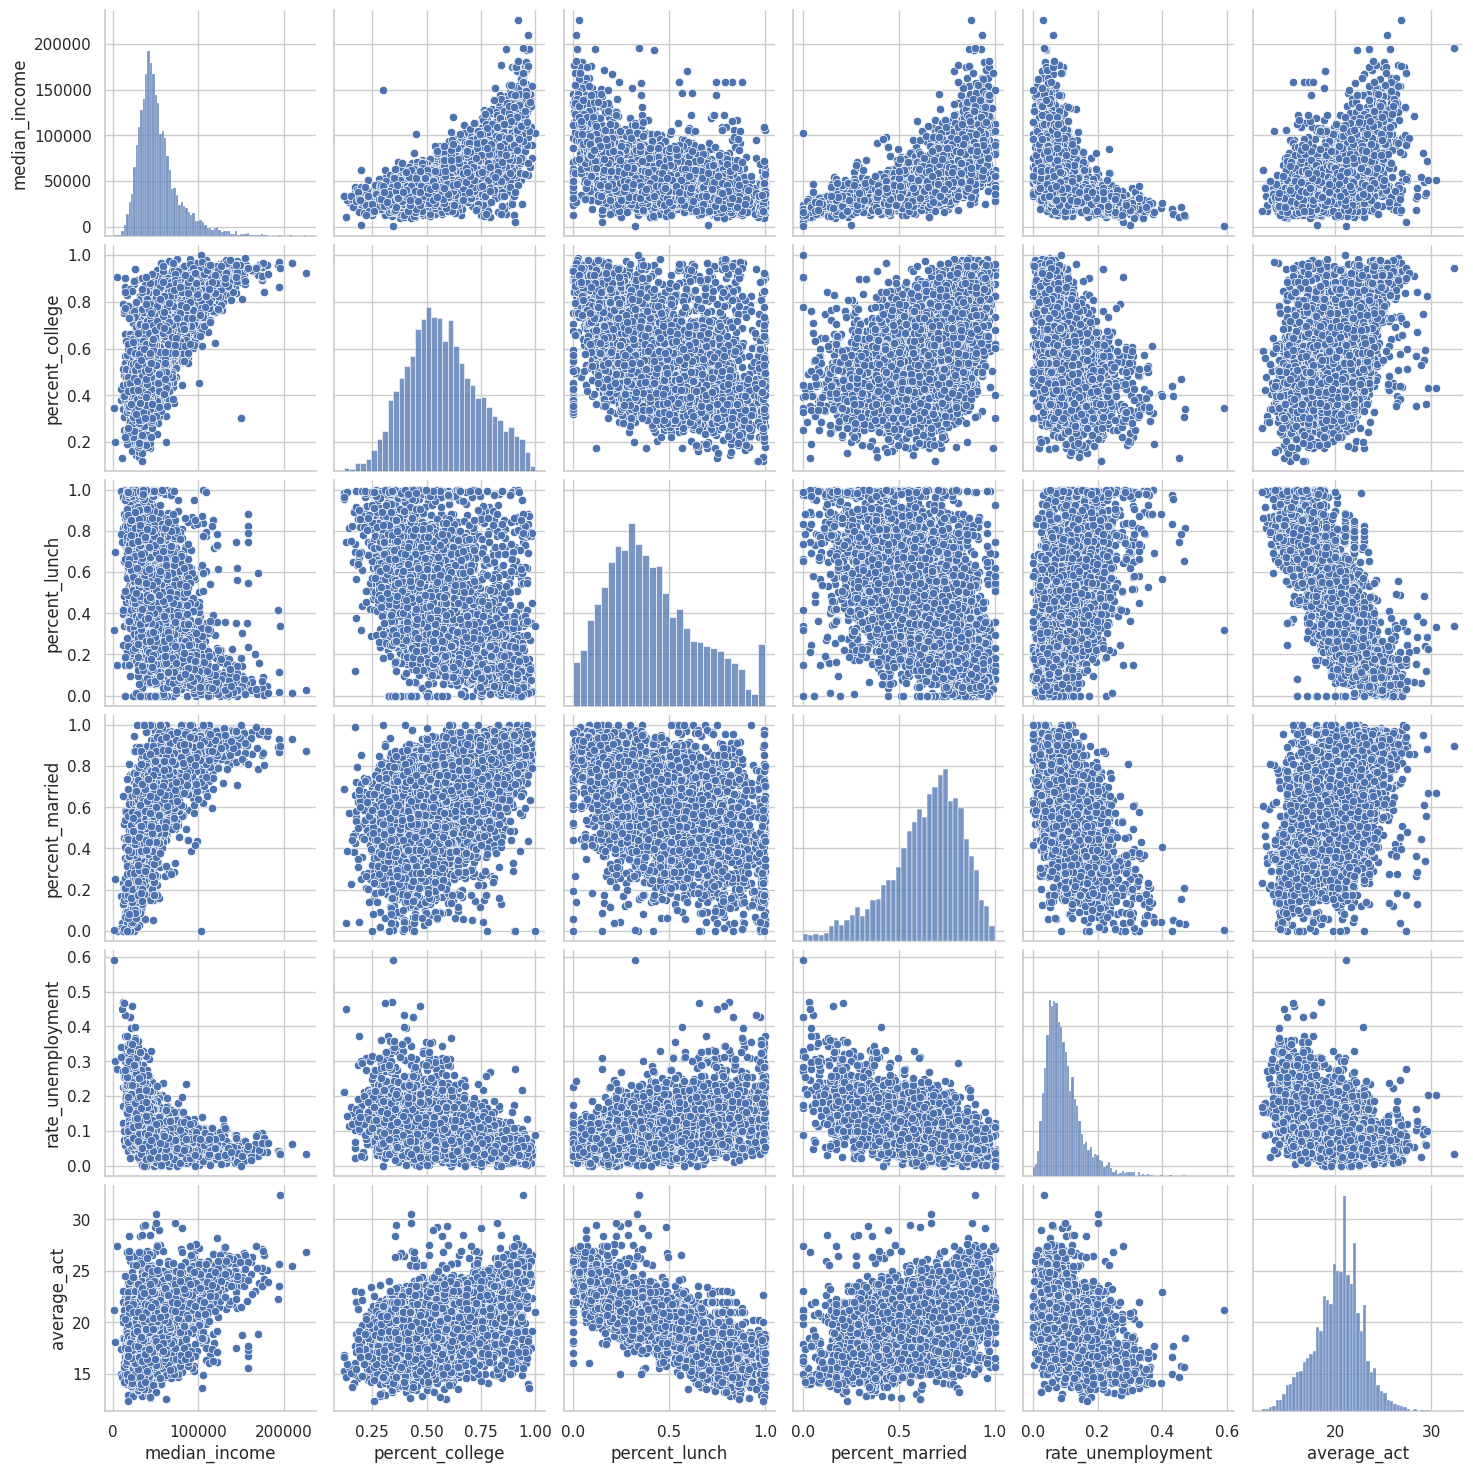

In [70]:
sns.pairplot(data = df_train.loc[:,['median_income', 'percent_college','percent_lunch','percent_married','rate_unemployment','average_act']])

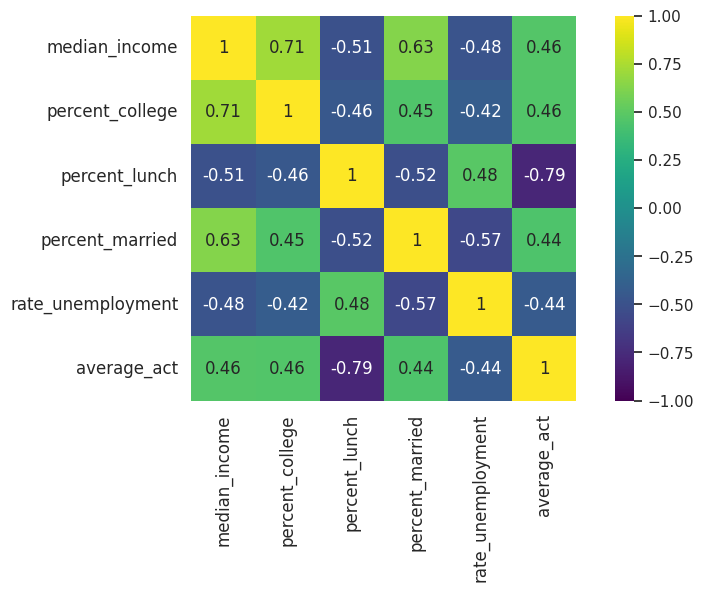

In [71]:
corr_matrix = df_train.loc[:,['median_income', 'percent_college','percent_lunch','percent_married','rate_unemployment','average_act']].corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')

plt.tick_params(labelsize=12);

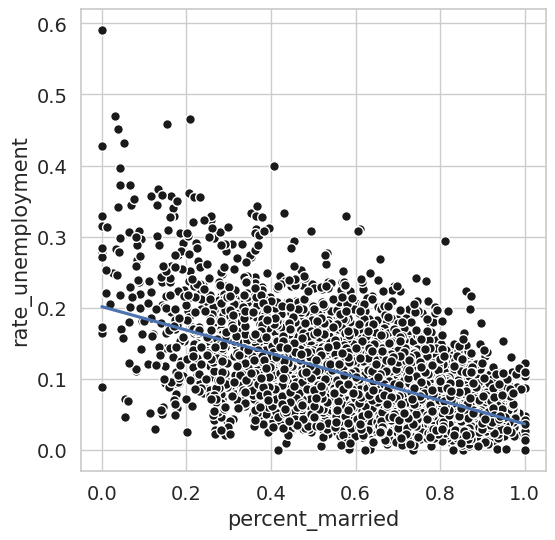

In [72]:
plt.figure(figsize=(6,6))

# Scatter plot 
plt.plot(df_train['percent_married'], df_train['rate_unemployment'], 'ko', mec ='w', ms=7)

# Add the regression line
sns.regplot(data=df, x = 'percent_married', y = 'rate_unemployment', order=1, scatter=False, ci=None)

# Add axis labels
plt.xlabel('percent_married', fontsize=15)
plt.ylabel('rate_unemployment', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

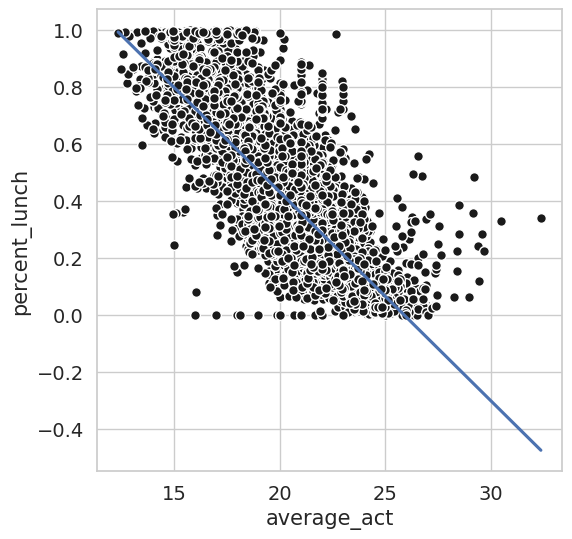

In [73]:
plt.figure(figsize=(6,6))

# Scatter plot 
plt.plot(df_train['average_act'], df_train['percent_lunch'], 'ko', mec ='w', ms=7)

# Add the regression line
sns.regplot(data=df, x = 'average_act', y = 'percent_lunch', order=1, scatter=False, ci=None)

# Add axis labels
plt.xlabel('average_act', fontsize=15)
plt.ylabel('percent_lunch', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

In [74]:
model = smf.ols(formula='average_act ~ percent_lunch', data=df).fit()

Which variables predict the average_act, and how?
Lunch has a higher correlation coefficient than all other variables. Could it be a proxy variable for other socioeconomic variables?


In [75]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                 1.154e+04
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:19:05   Log-Likelihood:                -13408.
No. Observations:                7207   AIC:                         2.682e+04
Df Residuals:                    7205   BIC:                         2.683e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7448      0.037    642.815

# Full model

In [76]:
model_complete = smf.ols(formula='average_act ~ median_income + percent_college + percent_lunch + percent_married + rate_unemployment', data=df_train).fit()

In [77]:
print(model_complete.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1985.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:19:05   Log-Likelihood:                -10654.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5775   BIC:                         2.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7774      0.15

What we have learned so far:

Median income and %married are not significant in the full model

R**2 is relatively large

In [78]:
anova_lm(model, model_complete)

df_resid           ssr  df_diff      ss_diff         F    Pr(>F)
0    7205.0  17426.798991      0.0          NaN       NaN       NaN
1    5775.0  13499.767093   1430.0  3927.031898  1.174773  0.000043

# Simple Models

## Median income

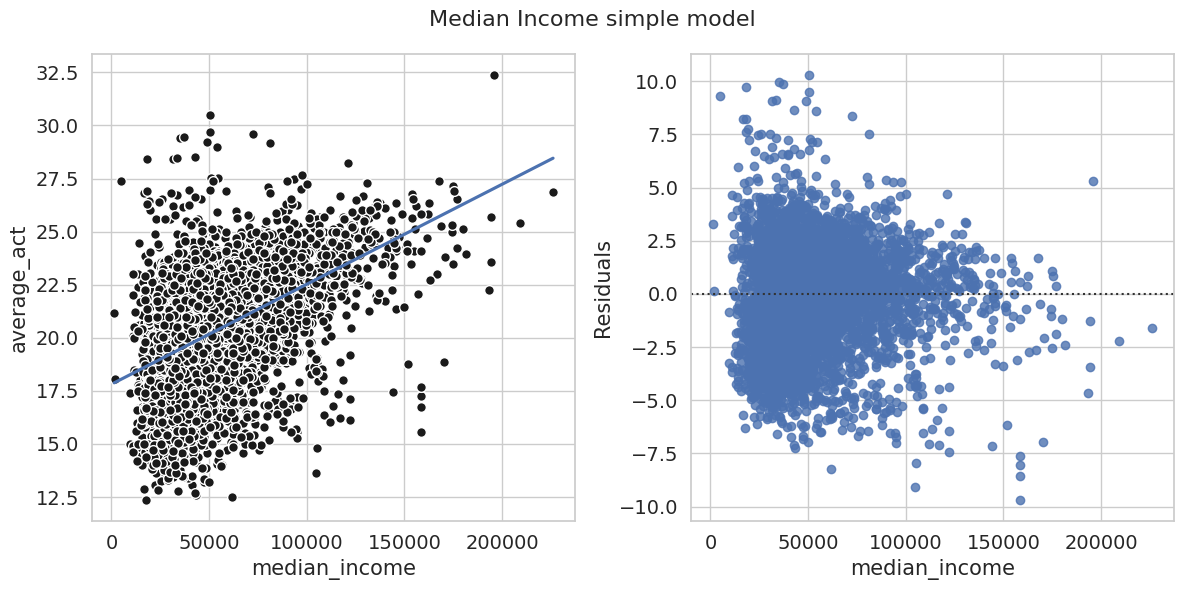

In [79]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Scatter plot
axs[0].plot(df_train['median_income'], df_train['average_act'], 'ko', mec='w', ms=7)

# Add the regression line
sns.regplot(data=df_train, x='median_income', y='average_act', order=1, scatter=False, ci=None, ax=axs[0])

# Add axis labels
axs[0].set_xlabel('median_income', fontsize=15)
axs[0].set_ylabel('average_act', fontsize=15)
axs[0].tick_params(labelsize=14)

# Residual plot
sns.residplot(data=df_train, x='median_income', y='average_act', order=1, ax=axs[1])
axs[1].set_xlabel('median_income', fontsize=15)
axs[1].set_ylabel('Residuals', fontsize=15)
axs[1].tick_params(labelsize=14)

# Add a title to the figure
fig.suptitle('Median Income simple model', fontsize=16)

plt.tight_layout()
plt.show()


In [80]:
# Compute the natural logarithm of median_income
df_train['log_median_income'] = np.log(df_train['median_income'])


In [81]:
df_test['log_median_income'] = np.log(df_test['median_income'])

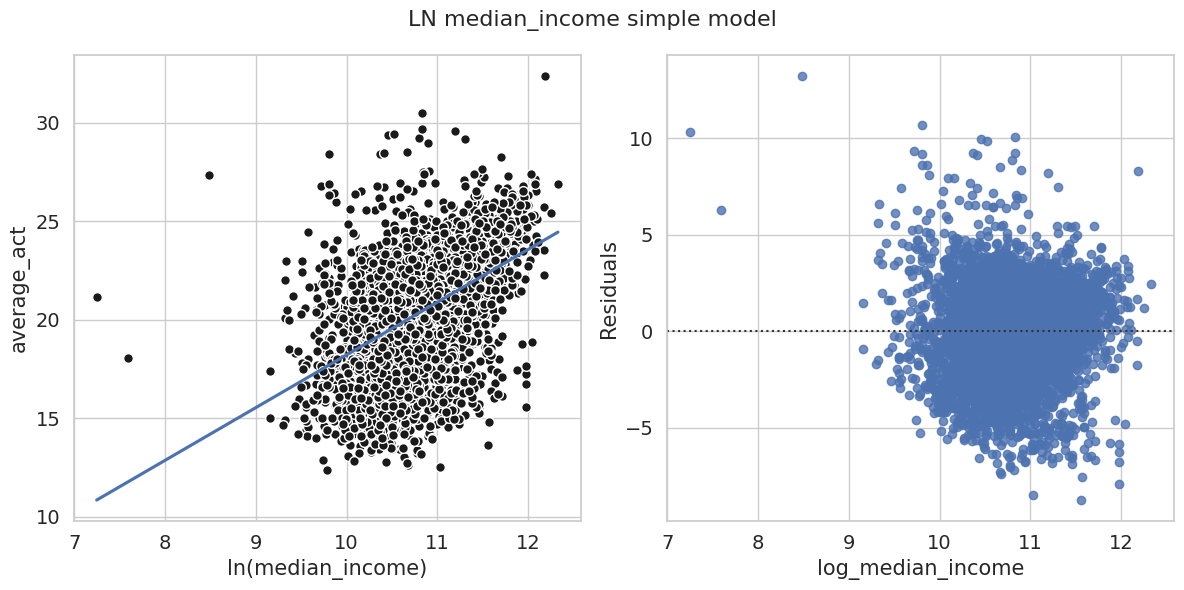

In [82]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Scatter plot
axs[0].plot(df_train['log_median_income'], df_train['average_act'], 'ko', mec ='w', ms=7)
sns.regplot(data=df_train, x = 'log_median_income', y = 'average_act', order=1, scatter=False, ci=None, ax=axs[0])

# Add axis labels
axs[0].set_xlabel('ln(median_income)', fontsize=15)
axs[0].set_ylabel('average_act', fontsize=15)

# Increase the fontsize of the tick labels
axs[0].tick_params(labelsize=14);

# Residual plot
sns.residplot(data=df_train, x='log_median_income', y='average_act', order=1, ax=axs[1])
axs[1].set_xlabel('log_median_income', fontsize=15)
axs[1].set_ylabel('Residuals', fontsize=15)
axs[1].tick_params(labelsize=14)

# Add a title to the figure
fig.suptitle('LN median_income simple model', fontsize=16)

plt.tight_layout()
plt.show()

In [83]:
# Compute the square root of median_income
df_train['sqrt_median_income'] = np.sqrt(df_train['median_income'])

In [84]:
# Compute the square root of median_income
df_test['sqrt_median_income'] = np.sqrt(df_test['median_income'])

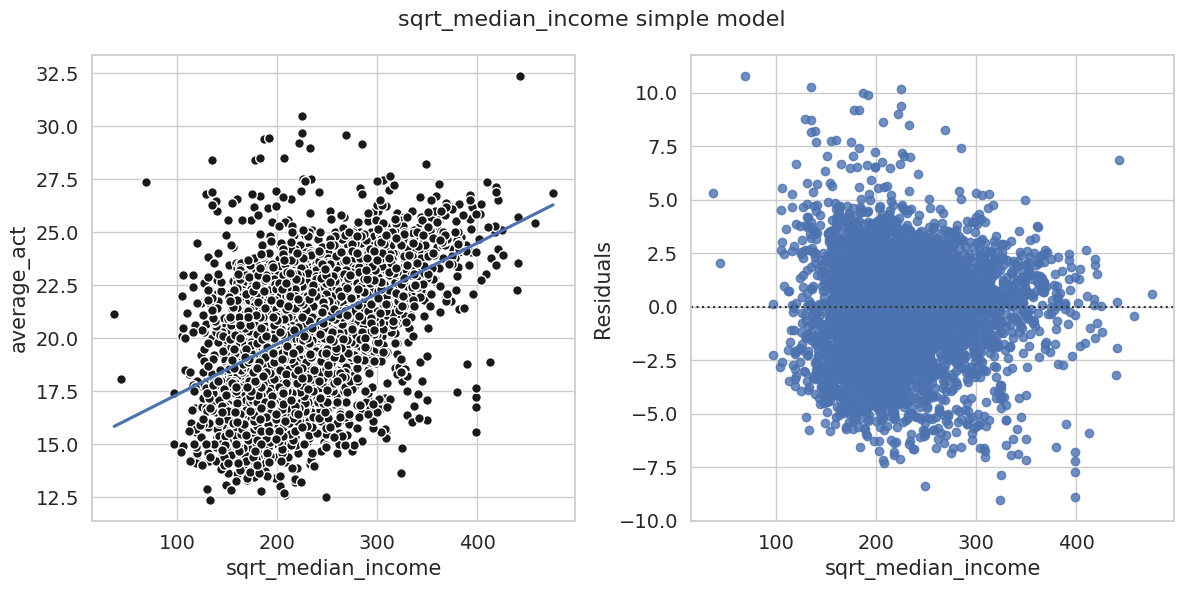

In [85]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Scatter plot
axs[0].plot(df_train['sqrt_median_income'], df_train['average_act'], 'ko', mec ='w', ms=7)
sns.regplot(data=df_train, x = 'sqrt_median_income', y = 'average_act', order=1, scatter=False, ci=None, ax=axs[0])

# Add axis labels
axs[0].set_xlabel('sqrt_median_income', fontsize=15)
axs[0].set_ylabel('average_act', fontsize=15)

# Increase the fontsize of the tick labels
axs[0].tick_params(labelsize=14);

# Residual plot
sns.residplot(data=df_train, x='sqrt_median_income', y='average_act', order=1, ax=axs[1])
axs[1].set_xlabel('sqrt_median_income', fontsize=15)
axs[1].set_ylabel('Residuals', fontsize=15)
axs[1].tick_params(labelsize=14)

# Add a title to the figure
fig.suptitle('sqrt_median_income simple model', fontsize=16)

plt.tight_layout()
plt.show()

Create simple models with average act and other variables: 'median_income', 'percent_college','percent_lunch','percent_married','rate_unemployment'



## Percent Lunch

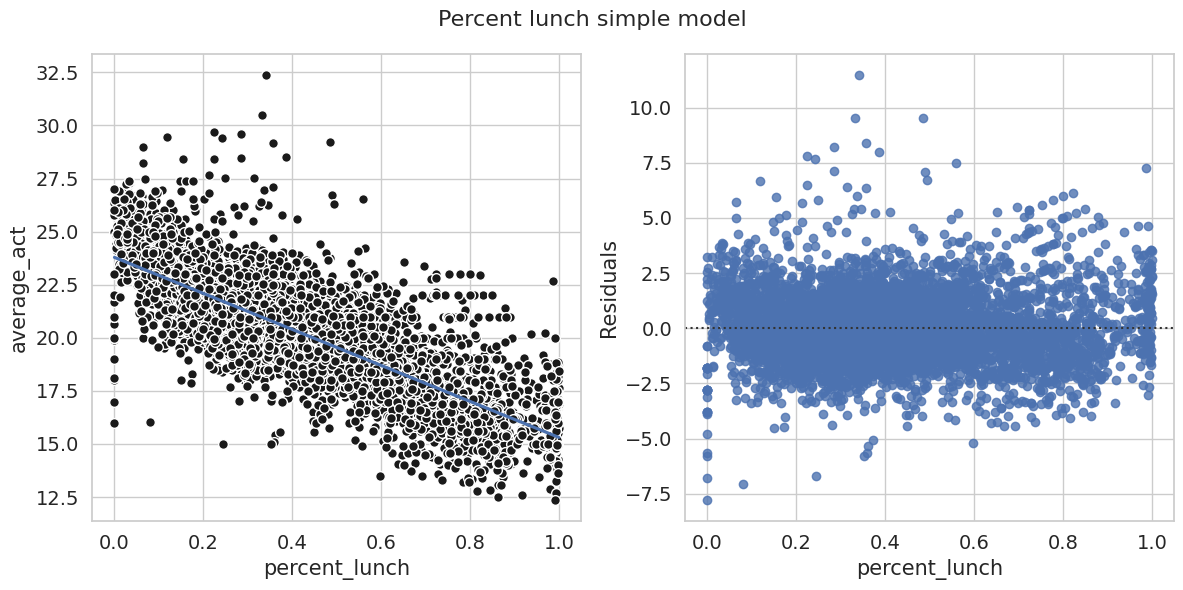

In [86]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Scatter plot
axs[0].plot(df_train['percent_lunch'], df_train['average_act'], 'ko', mec='w', ms=7)

# Add the regression line
sns.regplot(data=df_train, x='percent_lunch', y='average_act', order=1, scatter=False, ci=None, ax=axs[0])

# Add axis labels
axs[0].set_xlabel('percent_lunch', fontsize=15)
axs[0].set_ylabel('average_act', fontsize=15)
axs[0].tick_params(labelsize=14)

# Residual plot
sns.residplot(data=df_train, x='percent_lunch', y='average_act', order=1, ax=axs[1])
axs[1].set_xlabel('percent_lunch', fontsize=15)
axs[1].set_ylabel('Residuals', fontsize=15)
axs[1].tick_params(labelsize=14)

# Add a title to the figure
fig.suptitle('Percent lunch simple model', fontsize=16)

plt.tight_layout()
plt.show()

## Percent college

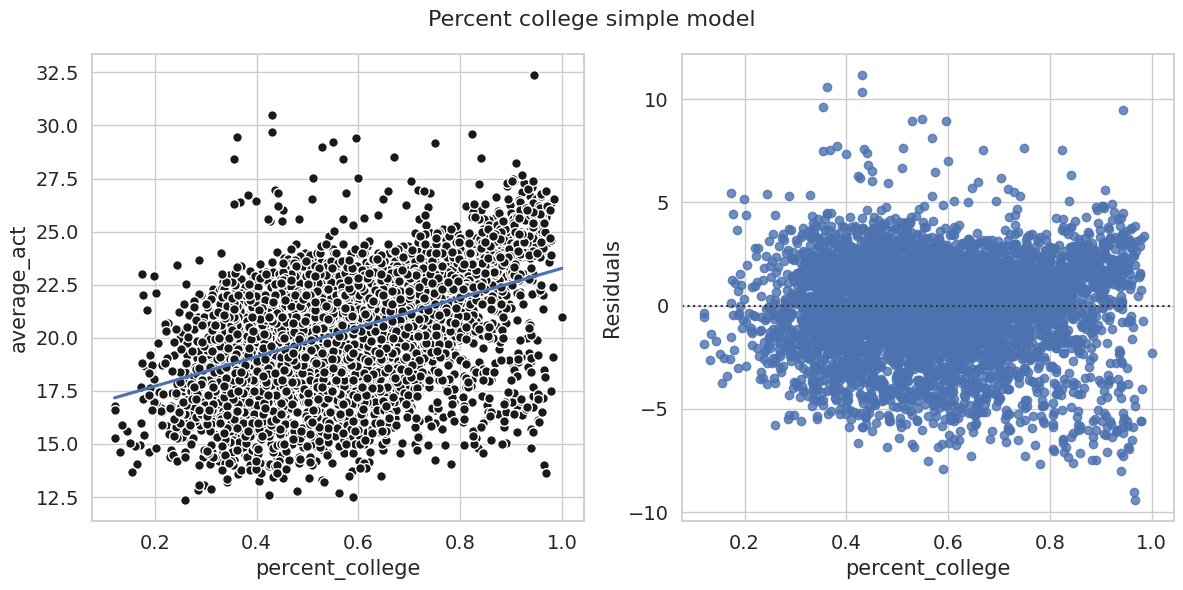

In [87]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Scatter plot
axs[0].plot(df_train['percent_college'], df_train['average_act'], 'ko', mec='w', ms=7)

# Add the regression line
sns.regplot(data=df_train, x='percent_college', y='average_act', order=1, scatter=False, ci=None, ax=axs[0])

# Add axis labels
axs[0].set_xlabel('percent_college', fontsize=15)
axs[0].set_ylabel('average_act', fontsize=15)
axs[0].tick_params(labelsize=14)

# Residual plot
sns.residplot(data=df_train, x='percent_college', y='average_act', order=1, ax=axs[1])
axs[1].set_xlabel('percent_college', fontsize=15)
axs[1].set_ylabel('Residuals', fontsize=15)
axs[1].tick_params(labelsize=14)

# Add a title to the figure
fig.suptitle('Percent college simple model', fontsize=16)

plt.tight_layout()
plt.show()

## Percent married

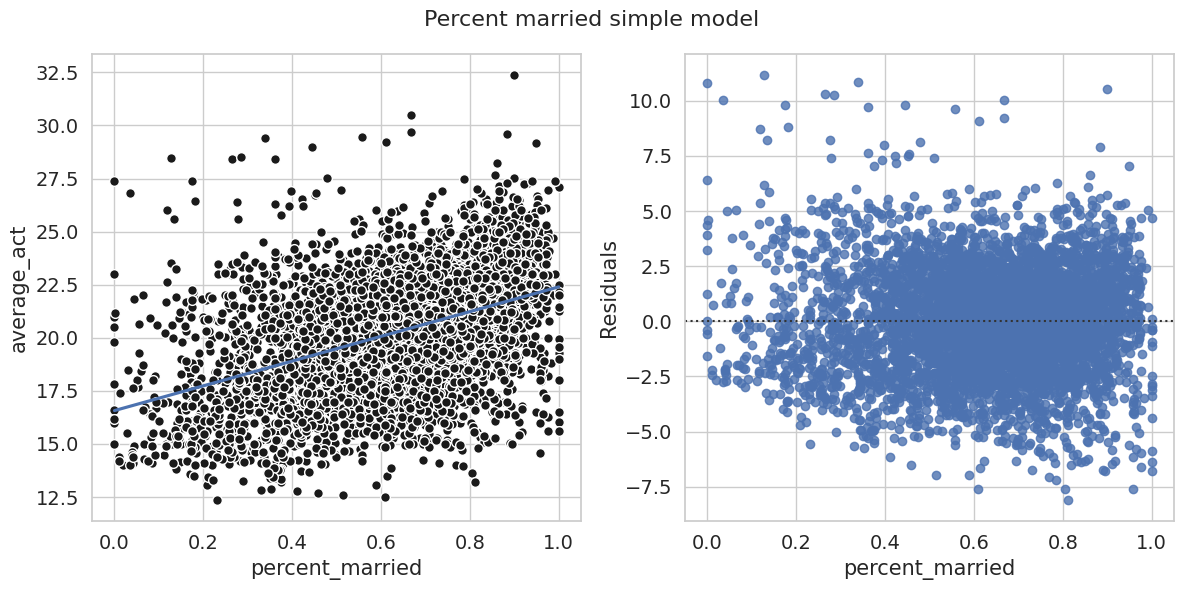

In [88]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Scatter plot
axs[0].plot(df_train['percent_married'], df_train['average_act'], 'ko', mec='w', ms=7)

# Add the regression line
sns.regplot(data=df_train, x='percent_married', y='average_act', order=1, scatter=False, ci=None, ax=axs[0])

# Add axis labels
axs[0].set_xlabel('percent_married', fontsize=15)
axs[0].set_ylabel('average_act', fontsize=15)
axs[0].tick_params(labelsize=14)

# Residual plot
sns.residplot(data=df_train, x='percent_married', y='average_act', order=1, ax=axs[1])
axs[1].set_xlabel('percent_married', fontsize=15)
axs[1].set_ylabel('Residuals', fontsize=15)
axs[1].tick_params(labelsize=14)

# Add a title to the figure
fig.suptitle('Percent married simple model', fontsize=16)

plt.tight_layout()
plt.show()

## Rate of Unemployment

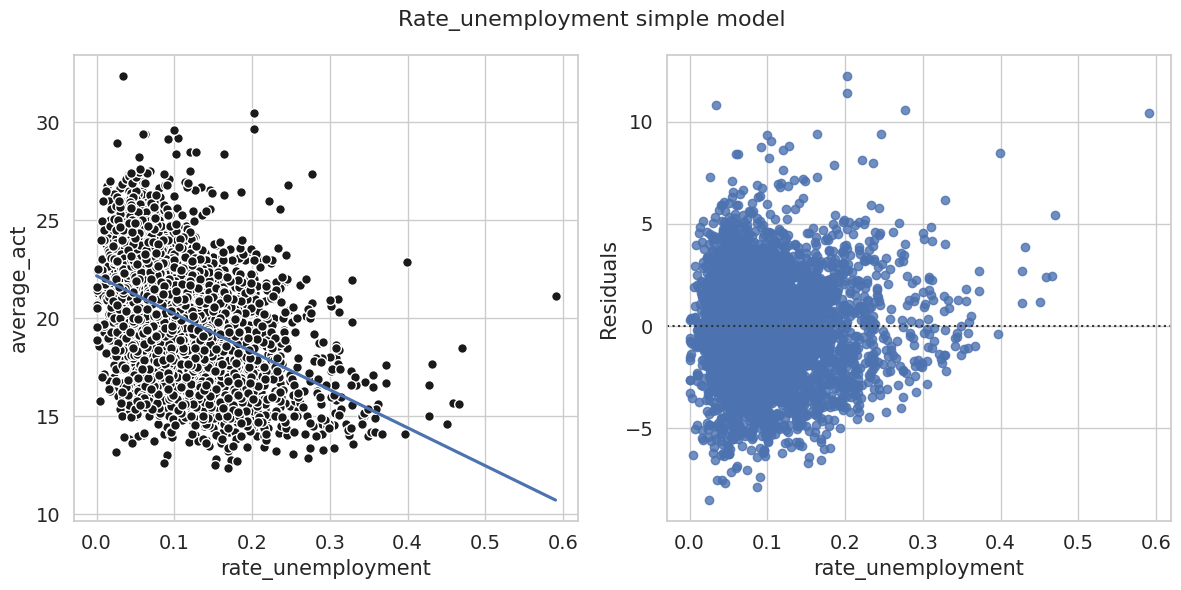

In [89]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Scatter plot 
axs[0].plot(df_train['rate_unemployment'], df_train['average_act'], 'ko', mec ='w', ms=7)

# Add the regression line
sns.regplot(data=df_train, x = 'rate_unemployment', y = 'average_act', order=1, scatter=False, ci=None, ax = axs[0])

# Add axis labels
axs[0].set_xlabel('rate_unemployment', fontsize=15)
axs[0].set_ylabel('average_act', fontsize=15)

# Increase the fontsize of the tick labels
axs[0].tick_params(labelsize=14);

# Residuals plot
sns.residplot(data=df_train, x='rate_unemployment', y='average_act', order=1, ax=axs[1])
axs[1].set_xlabel('rate_unemployment', fontsize=15)
axs[1].set_ylabel('Residuals', fontsize=15)
axs[1].tick_params(labelsize=14)

# Add a title to the figure
fig.suptitle('Rate_unemployment simple model', fontsize=16)

plt.tight_layout()
plt.show()


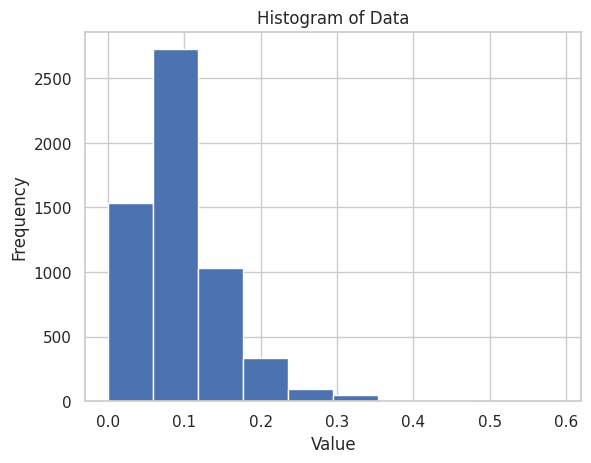

In [90]:
# Create a histogram with 10 bins
plt.hist(df_train['rate_unemployment'], bins=10)

# Add axis labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show the plot
plt.show()


In [91]:
df_train['exp_rate_unemployment'] = np.exp(df_train['rate_unemployment'])

In [92]:
df_test['exp_rate_unemployment'] = np.exp(df_test['rate_unemployment'])

In [93]:
df_train['exp_rate_unemployment'].describe()

count    5781.000000
mean        1.102624
std         0.066010
min         1.000000
25%         1.059108
50%         1.087096
75%         1.128422
max         1.804490
Name: exp_rate_unemployment, dtype: float64

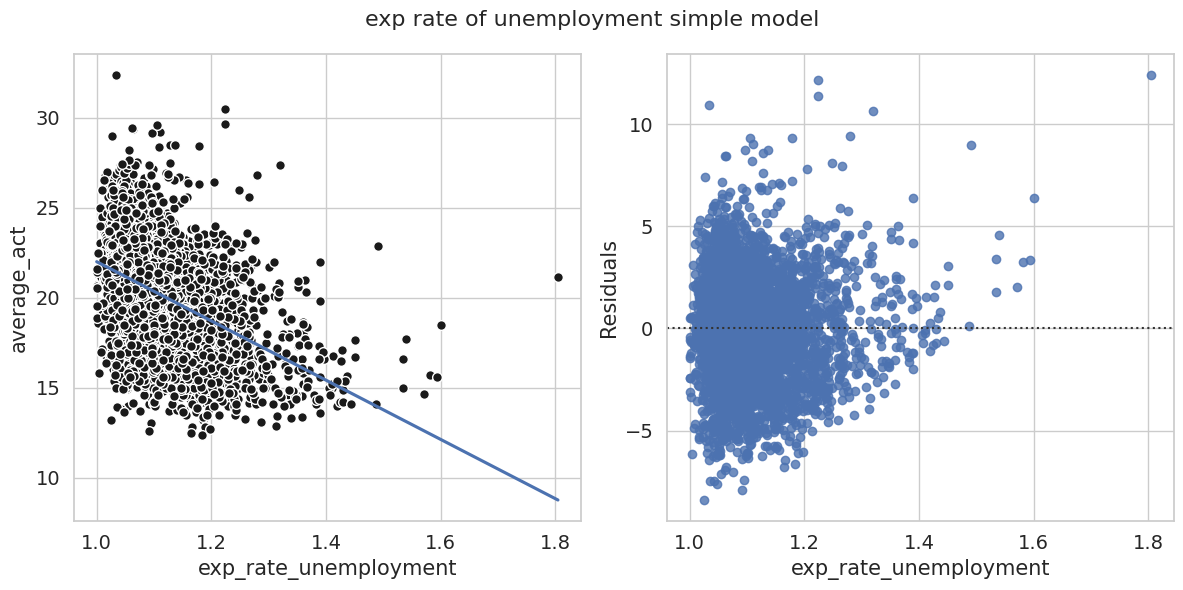

In [94]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Scatter plot 
axs[0].plot(df_train['exp_rate_unemployment'], df_train['average_act'], 'ko', mec ='w', ms=7)

# Add the regression line
sns.regplot(data=df_train, x = 'exp_rate_unemployment', y = 'average_act', order=1, scatter=False, ci=None, ax = axs[0])

# Add axis labels
axs[0].set_xlabel('exp_rate_unemployment', fontsize=15)
axs[0].set_ylabel('average_act', fontsize=15)

# Increase the fontsize of the tick labels
axs[0].tick_params(labelsize=14);

# Residuals plot
sns.residplot(data=df_train, x='exp_rate_unemployment', y='average_act', order=1, ax=axs[1])
axs[1].set_xlabel('exp_rate_unemployment', fontsize=15)
axs[1].set_ylabel('Residuals', fontsize=15)
axs[1].tick_params(labelsize=14)

# Add a title to the figure
fig.suptitle('exp rate of unemployment simple model', fontsize=16)

plt.tight_layout()
plt.show()

In [95]:
df_train['sqrt_rate_unemployment'] = np.sqrt(df_train['rate_unemployment'])

In [96]:
df_test['sqrt_rate_unemployment'] = np.sqrt(df_test['rate_unemployment'])

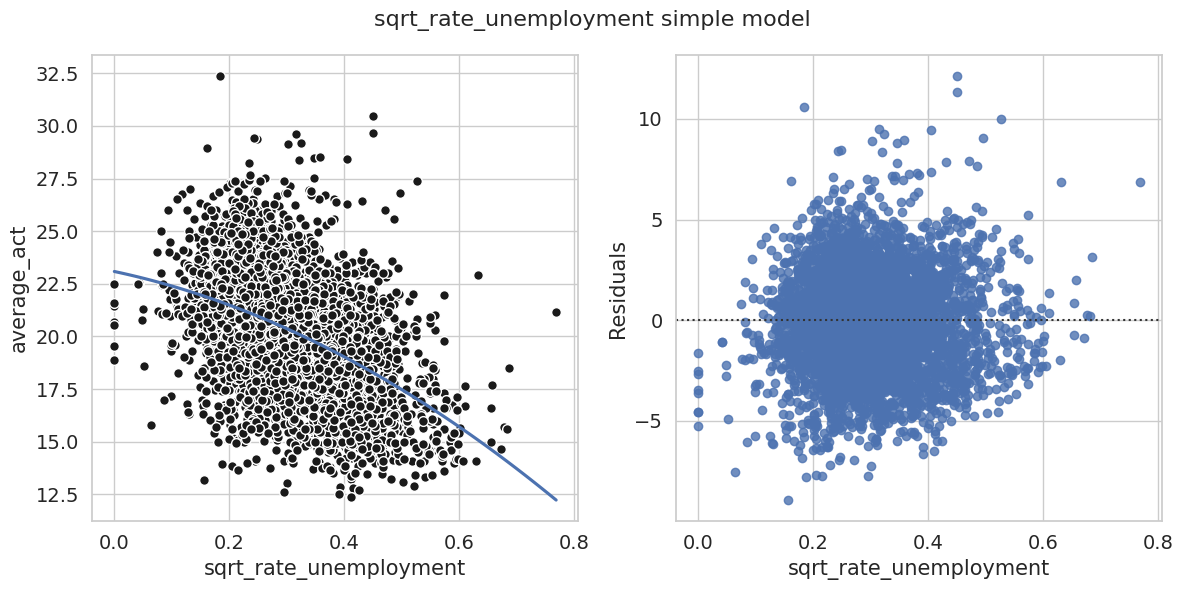

In [97]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Scatter plot 
axs[0].plot(df_train['sqrt_rate_unemployment'], df_train['average_act'], 'ko', mec ='w', ms=7)

# Add the regression line
sns.regplot(data=df_train, x = 'sqrt_rate_unemployment', y = 'average_act', order=2, scatter=False, ci=None, ax = axs[0])

# Add axis labels
axs[0].set_xlabel('sqrt_rate_unemployment', fontsize=15)
axs[0].set_ylabel('average_act', fontsize=15)

# Increase the fontsize of the tick labels
axs[0].tick_params(labelsize=14);

# Residuals plot
sns.residplot(data=df_train, x='sqrt_rate_unemployment', y='average_act', order=1, ax=axs[1])
axs[1].set_xlabel('sqrt_rate_unemployment', fontsize=15)
axs[1].set_ylabel('Residuals', fontsize=15)
axs[1].tick_params(labelsize=14)

# Add a title to the figure
fig.suptitle('sqrt_rate_unemployment simple model', fontsize=16)

plt.tight_layout()
plt.show()

In [98]:
df_train.head()

median_income  percent_college  percent_lunch  percent_married  \
3663        41793.0         0.602419       0.542056         0.574034   
1689        38173.0         0.469225       0.339655         0.711429   
5852        39635.0         0.567361       0.270175         0.694514   
3288        40978.0         0.467614       0.315556         0.766901   
378         36875.0         0.604470       0.548410         0.803435   

      rate_unemployment school_level     school_type state       year  \
3663           0.111111         High  Regular School    NJ  2016-2017   
1689           0.135246         High  Regular School    IN  2016-2017   
5852           0.083419         High  Regular School    PA  2016-2017   
3288           0.062531         High  Regular School    MO  2016-2017   
378            0.071429         High  Regular School    FL  2016-2017   

     zip_code  average_act  log_median_income  sqrt_median_income  \
3663     7306    16.538462          10.640484          204.433363   
1689    47567    20.367521          10.549884          195.379119   
5852    15853    20.347985          10.587468          199.085409   
3288    64644    21.600000          10.620791          202.430235   
378     34669    21.056166          10.515289          192.028644   

      exp_rate_unemployment  sqrt_rate_unemployment  
3663               1.117519                0.333333  
1689               1.144818                0.367758  
5852               1.086997                0.288824  
3288               1.064528                0.250063  
378                1.074041                0.267261

In [99]:
# Use the '.difference()' method to select all columns except the ones in 'cols_to_exclude'
df_train_subset = df_train[df_train.columns.difference(['school_level', 'school_type', 'state','year','zip_code'])]

In [100]:
df_test_subset = df_test[df_test.columns.difference(['school_level', 'school_type', 'state','year','zip_code'])]

In [101]:
df_train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781 entries, 3663 to 5736
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   average_act             5781 non-null   float64
 1   exp_rate_unemployment   5781 non-null   float64
 2   log_median_income       5781 non-null   float64
 3   median_income           5781 non-null   float64
 4   percent_college         5781 non-null   float64
 5   percent_lunch           5781 non-null   float64
 6   percent_married         5781 non-null   float64
 7   rate_unemployment       5781 non-null   float64
 8   sqrt_median_income      5781 non-null   float64
 9   sqrt_rate_unemployment  5781 non-null   float64
dtypes: float64(10)
memory usage: 625.8 KB


In [102]:
# Create an empty dictionary to store the models
models = {}

# Loop through each column except 'average_act'
for col in df_train_subset.columns:
    if col != 'average_act':
        # Build a linear regression model using 'average_act' and the current column
        X = df_train_subset[[col]]
        y = df_train_subset['average_act']
        model = LinearRegression().fit(X, y)

        # Store the model in the dictionary using the column name as the key
        models[col] = model

In [103]:
# Create an empty dictionary to store the models
models = {}

# Loop through each column except 'average_act'
for col in df_train_subset.columns:
    if col != 'average_act':
        # Build a linear regression model using 'average_act' and the current column
        X = df_train_subset[[col]]
        y = df_train_subset['average_act']

        # Store the model in the dictionary using the column name as the key
        models[col] = LinearRegression().fit(X, y)

# Create an empty dictionary to store the accuracy scores
accuracy_scores = {}

# Loop through each column in df_test
for col in df_test.columns:
    if col in models:
        # Use the corresponding linear regression model to make predictions on df_test
        X_test = df_test[[col]]
        y_test = df_test['average_act']
        y_pred = models[col].predict(X_test)

        # Calculate the accuracy of the model
        accuracy = models[col].score(X_test, y_test)
        accuracy_scores[col] = accuracy

# Create a pandas DataFrame to store the models and their accuracy scores
table_data = {'Model': list(models.keys()), 'Accuracy': list(accuracy_scores.values())}
df_table = pd.DataFrame(data=table_data)

# Print the table
print(df_table)


                    Model  Accuracy
0   exp_rate_unemployment  0.195183
1       log_median_income  0.216962
2           median_income  0.590130
3         percent_college  0.185254
4           percent_lunch  0.173697
5         percent_married  0.199510
6       rate_unemployment  0.202664
7      sqrt_median_income  0.170436
8  sqrt_rate_unemployment  0.171855


In [104]:

# Create an empty dictionary to store the models
models = {}
summaries = {}
# Loop through each column except 'average_act'
for col in df_train_subset.columns:
    if col != 'average_act':
        # Build a linear regression model using 'average_act' and the current column
        X = df_train_subset[[col]]
        y = df_train_subset['average_act']

        # Store the model in the dictionary using the column name as the key
        models[col] = LinearRegression().fit(X, y)

        # Print the summary of the model
        X = sm.add_constant(X) # Add a constant term for intercept
        model = sm.OLS(y, X).fit()
        summaries[col]= model.summary()

        #print(f'Summary of model for {col}:')
        #print(model.summary())

# Create an empty dictionary to store the accuracy scores
accuracy_scores = {}

# Loop through each column in df_test
for col in df_test.columns:
    if col in models:
        # Use the corresponding linear regression model to make predictions on df_test
        X_test = df_test[[col]]
        y_test = df_test['average_act']
        y_pred = models[col].predict(X_test)

        # Calculate the accuracy of the model
        accuracy = models[col].score(X_test, y_test)
        accuracy_scores[col] = accuracy

# Create a pandas DataFrame to store the models and their accuracy scores
table_data = {'Model': list(models.keys()), 'Accuracy': list(accuracy_scores.values())}
df_table = pd.DataFrame(data=table_data)



# Print the table
print(df_table)


                    Model  Accuracy
0   exp_rate_unemployment  0.195183
1       log_median_income  0.216962
2           median_income  0.590130
3         percent_college  0.185254
4           percent_lunch  0.173697
5         percent_married  0.199510
6       rate_unemployment  0.202664
7      sqrt_median_income  0.170436
8  sqrt_rate_unemployment  0.171855


## Summaries and model comparison

In [105]:
pd.set_option('display.max_columns', None)
t = widgets.TabBar(['median_income','log_median_income', 'sqrt_median_income','percent_college','percent_lunch','percent_married','rate_unemployment','exp_rate_unemployment','sqrt_rate_unemployment'])
with t.output_to(0):
  print(summaries['median_income'])
with t.output_to(1):
  print(summaries['log_median_income'])
with t.output_to(2):
  print(summaries['sqrt_median_income'])
with t.output_to(3):
  print(summaries['percent_college'])
with t.output_to(4):
  print(summaries['percent_lunch'])
with t.output_to(5):
  print(summaries['percent_married'])
with t.output_to(6):
  print(summaries['rate_unemployment'])
with t.output_to(7):
  print(summaries['exp_rate_unemployment'])
with t.output_to(8):
  print(summaries['sqrt_rate_unemployment'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     1581.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          6.93e-306
Time:                        06:19:11   Log-Likelihood:                -12846.
No. Observations:                5781   AIC:                         2.570e+04
Df Residuals:                    5779   BIC:                         2.571e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.8147      0.069    256.723

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     1587.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          7.66e-307
Time:                        06:19:11   Log-Likelihood:                -12844.
No. Observations:                5781   AIC:                         2.569e+04
Df Residuals:                    5779   BIC:                         2.571e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.5420      0.72

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     1659.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          4.14e-319
Time:                        06:19:11   Log-Likelihood:                -12816.
No. Observations:                5781   AIC:                         2.564e+04
Df Residuals:                    5779   BIC:                         2.565e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.9447      0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1520.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          1.99e-295
Time:                        06:19:11   Log-Likelihood:                -12870.
No. Observations:                5781   AIC:                         2.574e+04
Df Residuals:                    5779   BIC:                         2.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.3351      0.106    1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     9407.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:19:11   Log-Likelihood:                -10753.
No. Observations:                5781   AIC:                         2.151e+04
Df Residuals:                    5779   BIC:                         2.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.7861      0.041    577.051

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     1402.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          7.60e-275
Time:                        06:19:11   Log-Likelihood:                -12918.
No. Observations:                5781   AIC:                         2.584e+04
Df Residuals:                    5779   BIC:                         2.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.5734      0.104    1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1363.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          4.30e-268
Time:                        06:19:11   Log-Likelihood:                -12933.
No. Observations:                5781   AIC:                         2.587e+04
Df Residuals:                    5779   BIC:                         2.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.1765      0.05

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     1320.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          2.00e-260
Time:                        06:19:11   Log-Likelihood:                -12951.
No. Observations:                5781   AIC:                         2.591e+04
Df Residuals:                    5779   BIC:                         2.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    38.46

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1355.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          1.28e-266
Time:                        06:19:11   Log-Likelihood:                -12936.
No. Observations:                5781   AIC:                         2.588e+04
Df Residuals:                    5779   BIC:                         2.589e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     24

<IPython.core.display.Javascript object>

full_model

In [106]:
model_complete2 = smf.ols(formula='average_act ~ sqrt_median_income + percent_college + percent_lunch + percent_married + rate_unemployment', data=df_train).fit()

In [107]:
print(model_complete2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1988.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:19:11   Log-Likelihood:                -10652.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5775   BIC:                         2.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             22.9216      0

# Subset selection

In [108]:
'''
comb = combinations([1,2,3],2)

for i in list(comb):
  print(i)
'''

'\ncomb = combinations([1,2,3],2)\n\nfor i in list(comb):\n  print(i)\n'

In [109]:
# df_train_subset2 = df_train_subset[['average_act', 'sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]

In [110]:
# df_train_subset2.info()

Compare each model with other models with the same number of variables. Write code for subset selection

In [111]:
'''
models = {}
summaries = {}

combinations = list(itertools.combinations(df_train_subset2.columns[1:], 2))

for combo in combinations:
    X = df_train_subset2[list(combo)]
    y = df_train_subset2['average_act']
    
    # model_name = f'combo'
    # models[model_name] = LinearRegression().fit(X, y)

   
    X = sm.add_constant(X)
    models[combo] = sm.OLS(y, X).fit()
    summaries[combo] = model.summary()
'''

"\nmodels = {}\nsummaries = {}\n\ncombinations = list(itertools.combinations(df_train_subset2.columns[1:], 2))\n\nfor combo in combinations:\n    X = df_train_subset2[list(combo)]\n    y = df_train_subset2['average_act']\n    \n    # model_name = f'combo'\n    # models[model_name] = LinearRegression().fit(X, y)\n\n   \n    X = sm.add_constant(X)\n    models[combo] = sm.OLS(y, X).fit()\n    summaries[combo] = model.summary()\n"

In [112]:
#for item in models.values():
  #print(item)

In [113]:
'''
level = {}
models = {}
aic = {}
bic = {}
r_squared = {}
cv_score = {}
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]

for num_var in range(1,len(predictors) +1):
  combinations = list(itertools.combinations(predictors, num_var))

  for combo in combinations:
      level[str(combo)] = num_var
      X = sm.add_constant(predictors[list(combo)])
      y = df_train_subset['average_act']
      model = sm.OLS(y, X).fit()
      name = ' + '.join(combo)
      models[name] = model
      r_squared[name] = model.rsquared
      aic[name] = model.aic
      bic[name] = model.bic   

table_data = {'level': list(level.values()), 
              'predictors': list(models.keys()),
              'r-squared': list(r_squared.values()),
              'aic': list(aic.values()),
              'bic': list(bic.values()),
              }

df_table = pd.DataFrame(data = table_data)

display(df_table)
'''

"\nlevel = {}\nmodels = {}\naic = {}\nbic = {}\nr_squared = {}\ncv_score = {}\npredictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]\n\nfor num_var in range(1,len(predictors) +1):\n  combinations = list(itertools.combinations(predictors, num_var))\n\n  for combo in combinations:\n      level[str(combo)] = num_var\n      X = sm.add_constant(predictors[list(combo)])\n      y = df_train_subset['average_act']\n      model = sm.OLS(y, X).fit()\n      name = ' + '.join(combo)\n      models[name] = model\n      r_squared[name] = model.rsquared\n      aic[name] = model.aic\n      bic[name] = model.bic   \n\ntable_data = {'level': list(level.values()), \n              'predictors': list(models.keys()),\n              'r-squared': list(r_squared.values()),\n              'aic': list(aic.values()),\n              'bic': list(bic.values()),\n              }\n\ndf_table = pd.DataFrame(data = table_data)\n\ndisplay(df_table)\n"

## Basic code for function

In [114]:
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
y = df_train_subset['average_act']

table = list()
for num_var in range(1, len(predictors)+1):
    for combo in itertools.combinations(predictors, num_var):
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        table.append([num_var, ' + '.join(combo), model.rsquared, model.aic, model.bic])

df_table = pd.DataFrame(table, columns=['level', 'predictors', 'r-squared', 'aic', 'bic'])
df_table.insert(0, 'model', df_table.index + 1)

display(df_table)


model  level                                         predictors  \
0       1      1                                 sqrt_median_income   
1       2      1                                    percent_college   
2       3      1                                      percent_lunch   
3       4      1                                    percent_married   
4       5      1                                  rate_unemployment   
5       6      2               sqrt_median_income + percent_college   
6       7      2                 sqrt_median_income + percent_lunch   
7       8      2               sqrt_median_income + percent_married   
8       9      2             sqrt_median_income + rate_unemployment   
9      10      2                    percent_college + percent_lunch   
10     11      2                  percent_college + percent_married   
11     12      2                percent_college + rate_unemployment   
12     13      2                    percent_lunch + percent_married   
13     14      2                  percent_lunch + rate_unemployment   
14     15      2                percent_married + rate_unemployment   
15     16      3  sqrt_median_income + percent_college + percent...   
16     17      3  sqrt_median_income + percent_college + percent...   
17     18      3  sqrt_median_income + percent_college + rate_un...   
18     19      3  sqrt_median_income + percent_lunch + percent_m...   
19     20      3  sqrt_median_income + percent_lunch + rate_unem...   
20     21      3  sqrt_median_income + percent_married + rate_un...   
21     22      3  percent_college + percent_lunch + percent_married   
22     23      3  percent_college + percent_lunch + rate_unemplo...   
23     24      3  percent_college + percent_married + rate_unemp...   
24     25      3  percent_lunch + percent_married + rate_unemplo...   
25     26      4  sqrt_median_income + percent_college + percent...   
26     27      4  sqrt_median_income + percent_college + percent...   
27     28      4  sqrt_median_income + percent_college + percent...   
28     29      4  sqrt_median_income + percent_lunch + percent_m...   
29     30      4  percent_college + percent_lunch + percent_marr...   
30     31      5  sqrt_median_income + percent_college + percent...   

    r-squared           aic           bic  
0    0.223063  25635.259481  25648.584145  
1    0.208270  25744.292663  25757.617327  
2    0.619443  21509.223486  21522.548150  
3    0.195187  25839.040378  25852.365042  
4    0.190848  25870.128384  25883.453048  
5    0.251101  25424.774853  25444.761849  
6    0.623283  21452.593877  21472.580873  
7    0.251552  25421.294209  25441.281205  
8    0.270588  25272.357539  25292.344535  
9    0.630625  21338.807013  21358.794009  
10   0.278541  25208.984481  25228.971477  
11   0.281055  25188.801962  25208.788958  
12   0.621124  21485.625363  21505.612359  
13   0.623587  21447.932860  21467.919856  
14   0.246114  25463.147796  25483.134792  
15   0.630665  21340.183801  21366.833129  
16   0.283549  25170.709053  25197.358381  
17   0.294449  25082.085726  25108.735054  
18   0.623358  21453.448705  21480.098033  
19   0.625255  21424.252698  21450.902026  
20   0.280914  25191.933536  25218.582864  
21   0.630772  21338.512473  21365.161801  
22   0.632120  21317.376181  21344.025509  
23   0.305709  24989.079500  25015.728828  
24   0.623813  21446.453468  21473.102796  
25   0.630973  21337.361815  21370.673475  
26   0.632445  21314.262790  21347.574450  
27   0.307951  24972.378251  25005.689911  
28   0.625273  21425.982346  21459.294006  
29   0.632128  21319.247399  21352.559059  
30   0.632476  21315.771644  21355.745635

## Function: first attempt (with dictionaries)

In [115]:
def best_subset(predictors,y): 
  level = {}
  models = {}
  aic = {}
  bic = {}
  r_squared = {}

  for num_var in range(1,len(predictors) +1):
    combinations = list(itertools.combinations(predictors, num_var))

    for combo in combinations:
        level[str(combo)] = num_var
        X = sm.add_constant(predictors[list(combo)])
        model = sm.OLS(y, X).fit()
        name = ' + '.join(combo)
        models[name] = model
        r_squared[name] = model.rsquared
        aic[name] = model.aic
        bic[name] = model.bic      

  table_data = {'level': list(level.values()), 
                'predictors': list(models.keys()),
                'r-squared': list(r_squared.values()),
                'aic': list(aic.values()),
                'bic': list(bic.values()),
                }

  df_table = pd.DataFrame(data = table_data)

  return df_table

In [116]:
results = best_subset(df_train_subset[['sqrt_median_income','percent_college', 'percent_married', 'rate_unemployment']],df_train_subset['average_act'])

In [117]:
display(results)

level                                         predictors  r-squared  \
0       1                                 sqrt_median_income   0.223063   
1       1                                    percent_college   0.208270   
2       1                                    percent_married   0.195187   
3       1                                  rate_unemployment   0.190848   
4       2               sqrt_median_income + percent_college   0.251101   
5       2               sqrt_median_income + percent_married   0.251552   
6       2             sqrt_median_income + rate_unemployment   0.270588   
7       2                  percent_college + percent_married   0.278541   
8       2                percent_college + rate_unemployment   0.281055   
9       2                percent_married + rate_unemployment   0.246114   
10      3  sqrt_median_income + percent_college + percent...   0.283549   
11      3  sqrt_median_income + percent_college + rate_un...   0.294449   
12      3  sqrt_median_income + percent_married + rate_un...   0.280914   
13      3  percent_college + percent_married + rate_unemp...   0.305709   
14      4  sqrt_median_income + percent_college + percent...   0.307951   

             aic           bic  
0   25635.259481  25648.584145  
1   25744.292663  25757.617327  
2   25839.040378  25852.365042  
3   25870.128384  25883.453048  
4   25424.774853  25444.761849  
5   25421.294209  25441.281205  
6   25272.357539  25292.344535  
7   25208.984481  25228.971477  
8   25188.801962  25208.788958  
9   25463.147796  25483.134792  
10  25170.709053  25197.358381  
11  25082.085726  25108.735054  
12  25191.933536  25218.582864  
13  24989.079500  25015.728828  
14  24972.378251  25005.689911

## Function: second attempt (with lists)

In [118]:
def model_selection(df, predictors, outcome):
    table = list()
    y = df[outcome]

    for num_var in range(1, len(predictors)+1):
        for combo in itertools.combinations(sorted(predictors), num_var):
            X = df[list(combo)]
            model = sm.OLS(y, sm.add_constant(X)).fit()
            table.append([num_var, ' + '.join(combo), model.rsquared, model.aic, model.bic])

    df_table = pd.DataFrame(table, columns=['level', 'predictors', 'r-squared', 'aic', 'bic'])
    df_table.insert(0, 'model', df_table.index + 1)
    return df_table

In [119]:
results2 = model_selection(df_train_subset, ['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment'], 'average_act')

In [120]:
display(results2)

model  level                                         predictors  \
0       1      1                                    percent_college   
1       2      1                                      percent_lunch   
2       3      1                                    percent_married   
3       4      1                                  rate_unemployment   
4       5      1                                 sqrt_median_income   
5       6      2                    percent_college + percent_lunch   
6       7      2                  percent_college + percent_married   
7       8      2                percent_college + rate_unemployment   
8       9      2               percent_college + sqrt_median_income   
9      10      2                    percent_lunch + percent_married   
10     11      2                  percent_lunch + rate_unemployment   
11     12      2                 percent_lunch + sqrt_median_income   
12     13      2                percent_married + rate_unemployment   
13     14      2               percent_married + sqrt_median_income   
14     15      2             rate_unemployment + sqrt_median_income   
15     16      3  percent_college + percent_lunch + percent_married   
16     17      3  percent_college + percent_lunch + rate_unemplo...   
17     18      3  percent_college + percent_lunch + sqrt_median_...   
18     19      3  percent_college + percent_married + rate_unemp...   
19     20      3  percent_college + percent_married + sqrt_media...   
20     21      3  percent_college + rate_unemployment + sqrt_med...   
21     22      3  percent_lunch + percent_married + rate_unemplo...   
22     23      3  percent_lunch + percent_married + sqrt_median_...   
23     24      3  percent_lunch + rate_unemployment + sqrt_media...   
24     25      3  percent_married + rate_unemployment + sqrt_med...   
25     26      4  percent_college + percent_lunch + percent_marr...   
26     27      4  percent_college + percent_lunch + percent_marr...   
27     28      4  percent_college + percent_lunch + rate_unemplo...   
28     29      4  percent_college + percent_married + rate_unemp...   
29     30      4  percent_lunch + percent_married + rate_unemplo...   
30     31      5  percent_college + percent_lunch + percent_marr...   

    r-squared           aic           bic  
0    0.208270  25744.292663  25757.617327  
1    0.619443  21509.223486  21522.548150  
2    0.195187  25839.040378  25852.365042  
3    0.190848  25870.128384  25883.453048  
4    0.223063  25635.259481  25648.584145  
5    0.630625  21338.807013  21358.794009  
6    0.278541  25208.984481  25228.971477  
7    0.281055  25188.801962  25208.788958  
8    0.251101  25424.774853  25444.761849  
9    0.621124  21485.625363  21505.612359  
10   0.623587  21447.932860  21467.919856  
11   0.623283  21452.593877  21472.580873  
12   0.246114  25463.147796  25483.134792  
13   0.251552  25421.294209  25441.281205  
14   0.270588  25272.357539  25292.344535  
15   0.630772  21338.512473  21365.161801  
16   0.632120  21317.376181  21344.025509  
17   0.630665  21340.183801  21366.833129  
18   0.305709  24989.079500  25015.728828  
19   0.283549  25170.709053  25197.358381  
20   0.294449  25082.085726  25108.735054  
21   0.623813  21446.453468  21473.102796  
22   0.623358  21453.448705  21480.098033  
23   0.625255  21424.252698  21450.902026  
24   0.280914  25191.933536  25218.582864  
25   0.632128  21319.247399  21352.559059  
26   0.630973  21337.361815  21370.673475  
27   0.632445  21314.262790  21347.574450  
28   0.307951  24972.378251  25005.689911  
29   0.625273  21425.982346  21459.294006  
30   0.632476  21315.771644  21355.745635

In [121]:
results2.transpose()

0              1                2   \
model                     1              2                3   
level                     1              1                1   
predictors  percent_college  percent_lunch  percent_married   
r-squared           0.20827       0.619443         0.195187   
aic            25744.292663   21509.223486     25839.040378   
bic            25757.617327    21522.54815     25852.365042   

                           3                   4   \
model                       4                   5   
level                       1                   1   
predictors  rate_unemployment  sqrt_median_income   
r-squared            0.190848            0.223063   
aic              25870.128384        25635.259481   
bic              25883.453048        25648.584145   

                                         5   \
model                                     6   
level                                     2   
predictors  percent_college + percent_lunch   
r-squared                          0.630625   
aic                            21338.807013   
bic                            21358.794009   

                                           6   \
model                                       7   
level                                       2   
predictors  percent_college + percent_married   
r-squared                            0.278541   
aic                              25208.984481   
bic                              25228.971477   

                                             7   \
model                                         8   
level                                         2   
predictors  percent_college + rate_unemployment   
r-squared                              0.281055   
aic                                25188.801962   
bic                                25208.788958   

                                              8   \
model                                          9   
level                                          2   
predictors  percent_college + sqrt_median_income   
r-squared                               0.251101   
aic                                 25424.774853   
bic                                 25444.761849   

                                         9   \
model                                    10   
level                                     2   
predictors  percent_lunch + percent_married   
r-squared                          0.621124   
aic                            21485.625363   
bic                            21505.612359   

                                           10  \
model                                      11   
level                                       2   
predictors  percent_lunch + rate_unemployment   
r-squared                            0.623587   
aic                               21447.93286   
bic                              21467.919856   

                                            11  \
model                                       12   
level                                        2   
predictors  percent_lunch + sqrt_median_income   
r-squared                             0.623283   
aic                               21452.593877   
bic                               21472.580873   

                                             12  \
model                                        13   
level                                         2   
predictors  percent_married + rate_unemployment   
r-squared                              0.246114   
aic                                25463.147796   
bic                                25483.134792   

                                              13  \
model                                         14   
level                                          2   
predictors  percent_married + sqrt_median_income   
r-squared                               0.251552   
aic                                 25421.294209   
bic                                 25441.281205   

                                                14  \
model       

## Function: third attempt (with pivot table)

In [122]:
def model_selection2(df, predictors, outcome):
    levels = list()
    table = list()
    y = df[outcome]
    df_pivot = pd.DataFrame(columns = predictors)

    for num_var in range(1, len(predictors)+1):
        for combo in itertools.combinations(sorted(predictors), num_var):
            X = df[list(combo)]
            model = sm.OLS(y, sm.add_constant(X)).fit()
            table.append([num_var, ' + '.join(combo), round(model.rsquared,2), round(model.aic,2), round(model.bic,2)])

            df_table = pd.DataFrame(levels, columns = ['level', 'predictors', 'r-squared', 'aic', 'bic'])
            df_table.insert(0, 'model', df_table.index + 1)

    for index, row in df_table.iterrows():
          predictors = row['predictors'].split(' + ')
          for predictor in predictors:
              # df.loc[row_labels, column_labels]
              if predictor in predictors:
                df_pivot.loc[index, predictor] = 'X'  
              else:
                df_pivot.loc[index, predictor] = ' '

          result_df = pd.concat([df_table, df_pivot], axis=1).drop(['predictors'], axis=1).fillna('-')
          levels.append(result_df)
    return(levels)
'''
    result_df = pd.concat([df_table, df_pivot], axis = 1)
    result_df = result_df.drop(['predictors'], axis=1)
    result_df = result_df.fillna('-')
'''


"\n    result_df = pd.concat([df_table, df_pivot], axis = 1)\n    result_df = result_df.drop(['predictors'], axis=1)\n    result_df = result_df.fillna('-')\n"

In [123]:
results3 = model_selection2(df_train_subset, ['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment'], 'average_act')

In [124]:
results3

[]

## Function: Fourth attempt (separated by level)

In [125]:
def model_selection(df, predictors, outcome):
    table = list()
    y = df[outcome]

    for num_var in range(1, len(predictors)+1):
        for combo in itertools.combinations(sorted(predictors), num_var):
            X = df[list(combo)]
            model = sm.OLS(y, sm.add_constant(X)).fit()
            table.append([num_var, ' + '.join(combo), model.rsquared, model.aic, model.bic])

    df_table = pd.DataFrame(table, columns=['level', 'predictors', 'r-squared', 'aic', 'bic'])
    df_table.insert(0, 'model', df_table.index + 1)
    return df_table

In [126]:
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
y = df_train_subset['average_act']
df_list = list()
i = 0
for num_var in range(1, predictors.shape[1] + 1):
    table = list()
    for combo in itertools.combinations(predictors.columns, num_var):
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        table.append([num_var, ' + '.join(combo), model.rsquared, model.aic, model.bic])
    df_table = pd.DataFrame(table, columns=['level', 'predictors', 'r-squared', 'aic', 'bic'])
    df_table.insert(i, 'model', i + 1)
    df_list.append(df_table)


In [127]:
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
y = df_train_subset['average_act']
df_list = list()
df_best_per_level = list()
model_count = 0
for num_var in range(1, predictors.shape[1] + 1):
    table = list()
    for combo in itertools.combinations(predictors.columns, num_var):
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        table.append([model_count + 1, num_var, ' + '.join(combo), model.rsquared, model.aic, model.bic])
        model_count += 1

    df_table = pd.DataFrame(table, columns=['model', 'level', 'predictors', 'r-squared', 'aic', 'bic'])
    df_table = df_table.sort_values(by = ['r-squared'], ascending=False)
    df_list.append(df_table)
    df_best_per_level.append(df_table.iloc[0].tolist())
    
'''
for df in df_list:
    best = df.iloc[][]
    df_best_per_level.append(best)

level1_values = df.index.get_level_values(0).unique()
first_rows = []
for val in level1_values:
    first_row = df.loc[(val, slice(None)), :].iloc[0]
    first_rows.append(first_row)
    
# Print results
print(first_rows)
'''


'\nfor df in df_list:\n    best = df.iloc[][]\n    df_best_per_level.append(best)\n\nlevel1_values = df.index.get_level_values(0).unique()\nfirst_rows = []\nfor val in level1_values:\n    first_row = df.loc[(val, slice(None)), :].iloc[0]\n    first_rows.append(first_row)\n    \n# Print results\nprint(first_rows)\n'

In [128]:
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
df_pivot = pd.DataFrame(columns = ['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment'])
y = df_train_subset['average_act']
df_list_var_num = []
df_sorted_r2 = []
df_sorted_ar2 = []
df_sorted_aic = []
df_sorted_bic = []
df_models_all = []
df_best_per_level = []
df_best = []
list_of_dfs = []
model_count = 0
for num_var in range(1, predictors.shape[1] + 1):
    table = []
    for combo in itertools.combinations(predictors.columns, num_var):
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        table.append([model_count + 1, num_var, ' + '.join(combo), model.rsquared,round(model.rsquared_adj,5), round(model.aic,2), round(model.bic,2)] + list(model.params))
        df_models_all.append([model_count + 1, num_var, ' + '.join(combo), model.rsquared,model.rsquared_adj, round(model.aic,2), round(model.bic,2)] + list(model.params))
        model_count += 1
        df_coeff = pd.DataFrame(zip(X.columns, model.params[:-1]), columns=['predictors', 'coefficients'])
        df_coeff.loc[len(df_coeff)] = ['Intercept', model.params[-1]]
        df_coeff = df_coeff.set_index('predictors').T
        df_coeff.rows = ['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment', 'Intercept']
        list_of_dfs.append(df_coeff)

#result = pd.concat(table, axis=1, ignore_index=True)
#result.columns = ['model', 'num_var', 'predictors', 'r-squared', 'adj. r-squared', 'aic', 'bic', 'sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment', 'Intercept']
#result = result[['predictors', 'num_var', 'model', 'r-squared', 'adj. r-squared', 'aic', 'bic', 'sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment', 'Intercept']]


<ipython-input-128-7b4996b013a2>:25: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_coeff.rows = ['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment', 'Intercept']
<ipython-input-128-7b4996b013a2>:25: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_coeff.rows = ['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment', 'Intercept']
<ipython-input-128-7b4996b013a2>:25: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_coeff.rows = ['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment', 'Intercept']
<ipython-i

In [129]:
# Work in progress
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
y = df_train_subset['average_act']
df_list_var_num = []
df_sorted_r2 = []
df_sorted_ar2 = []
df_sorted_aic = []
df_sorted_bic = []
df_models_all = []
df_best_per_level = []
df_best = []
list_of_dfs = []
list_of_try = []
list_of_try2 = []
list_of_try3 = []
model_count = 0
for num_var in range(1, predictors.shape[1] + 1):
    table = []
    for combo in itertools.combinations(predictors.columns, num_var):
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        table.append([model_count + 1, num_var, ' + '.join(combo), model.rsquared,round(model.rsquared_adj,5), round(model.aic,2), round(model.bic,2)])
        df_models_all.append([model_count + 1, num_var, ' + '.join(combo), model.rsquared,model.rsquared_adj, round(model.aic,2), round(model.bic,2)])
        model_count += 1
        #print(model.params)
        df_coeff = pd.DataFrame(zip(X.columns, model.params[:-1]), columns=['predictors', 'coefficients'])
        df_coeff.loc[len(df_coeff)] = ['Intercept', model.params[-1]]
        df_coeff = df_coeff.set_index('predictors').T
        #print(df_coeff)
        #df_coeff.rows = ['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment', 'Intercept']
        #list_of_try2.append(model.params)
        df_try2 = pd.DataFrame(model.params).T
        output = []
        pvalues = model.pvalues
        for i in range(len(model.params)):
            if pvalues[i] < 0.001:
                output.append(f"{model.params.index[i]}: {model.params[i]:.4f}***")
            elif pvalues[i] < 0.01:
                output.append(f"{model.params.index[i]}: {model.params[i]:.4f}**")
            elif pvalues[i] < 0.05:
                output.append(f"{model.params.index[i]}: {model.params[i]:.4f}*")
            else:
                output.append(f"{model.params.index[i]}: {model.params[i]:.4f}")
        #df_try3 = pd.concat(output)       
        df_try2.insert(0, 'model', model_count + 1)
        list_of_try2.append(df_try2)
    list_of_try.append(pd.DataFrame(zip(X.columns, model.params[:-1]), columns=['predictors', 'coefficients']))
    df_table = pd.DataFrame(table, columns=['model', 'num_var', 'predictors', 'r-squared','adj. r-squared','aic', 'bic'])
    df_list_var_num.append(df_table)
    df_sorted_r2.append(df_table.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='r-squared'))
    df_sorted_ar2.append(df_table.sort_values(by=['adj. r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='adj. r-squared'))
    df_sorted_aic.append(df_table.sort_values(by = ['aic'], ascending=True).iloc[0].to_frame().T.assign(criterion='aic'))
    df_sorted_bic.append(df_table.sort_values(by = ['bic'], ascending=True).iloc[0].to_frame().T.assign(criterion='bic'))

concatenated_df = pd.concat(list_of_try2, ignore_index=True)

# reset index of the result dataframe
result_r2 = pd.concat([df_sorted_r2[0],df_sorted_r2[1],df_sorted_r2[2],df_sorted_r2[3],df_sorted_r2[4]]).reset_index(drop=True)
result_ar2= pd.concat([df_sorted_ar2[0],df_sorted_ar2[1],df_sorted_ar2[2],df_sorted_ar2[3],df_sorted_ar2[4]]).reset_index(drop=True)
result_aic= pd.concat([df_sorted_aic[0],df_sorted_aic[1],df_sorted_aic[2],df_sorted_aic[3],df_sorted_aic[4]]).reset_index(drop=True)
result_bic= pd.concat([df_sorted_bic[0],df_sorted_bic[1],df_sorted_bic[2],df_sorted_bic[3],df_sorted_bic[4]]).reset_index(drop=True)

result_ar2_sorted = result_r2.sort_values(by=['adj. r-squared'], ascending=False).reset_index(drop=True)
result_aic_sorted = result_r2.sort_values(by=['aic'], ascending=True).assign(criterion='aic').reset_index(drop=True)
result_bic_sorted = result_r2.sort_values(by=['bic'], ascending=True).assign(criterion='bic').reset_index(drop=True)

final_result = pd.concat([result_ar2_sorted.iloc[0], result_aic_sorted.iloc[0], result_bic_sorted.iloc[0]],axis=1).T.reset_index(drop=True)
final_result = final_result[['criterion','model', 'num_var', 'predictors', 'r-squared','adj. r-squared','aic', 'bic']]
'''
result_r2 = pd.DataFrame()
for df in df_sorted_r2:
    result_r2 = pd.concat([result_r2, df], ignore_index=True)
'''
'''
list_of_dfs.append(df_sorted_r2)
list_of_dfs.append(df_sorted_ar2)
list_of_dfs.append(df_sorted_aic)
list_of_dfs.append(df_sorted_bic)


for i, df in enumerate(list_of_dfs):
  first_row = df[i].iloc[0]
  first_row_with_index = pd.concat([first_row, pd.DataFrame({'index': [i] * len(first_row)})], axis=1)
  print(first_row_with_index)
'''

    #df_best_per_level = pd.concat([df_sorted_r2[0], df_sorted_ar2[0], df_sorted_aic[0], df_sorted_bic[0]])

    #df_best_per_level = df_best_per_level.append(best_row)
    #df_best_per_level.append(df_table_sorted.iloc[0].tolist())

df_models_all = pd.DataFrame(df_models_all, columns=['model', 'num_var', 'predictors', 'r-squared','adj. r-squared','aic', 'bic'])
#df_best_per_level = pd.DataFrame(df_best_per_level, columns=['model', 'num_var', 'predictors', 'r-squared', 'adj. r-squared','aic', 'bic'])
'''
best_adj_r2 = df_best_per_level.sort_values(by=['adj. r-squared'], ascending=False).iloc[0]
best_adj_r2['criterion'] = 'adj. r-squared'
best_aic = df_best_per_level.sort_values(by=['aic'], ascending=False).iloc[0]
best_aic['criterion'] = 'aic'
best_bic = df_best_per_level.sort_values(by=['bic'], ascending=False).iloc[0]
best_bic['criterion'] = 'bic'
df_best = pd.concat([best_adj_r2, best_aic, best_bic], axis = 1 ).transpose()\
          .reindex(columns=['criterion', 'model', 'num_var', 'predictors', 'r-squared', 'adj. r-squared', 'aic', 'bic'])
'''

'''
for index, row in df_table.iterrows():
          predictors = row['predictors'].split(' + ')
          for predictor in predictors:
              # df.loc[row_labels, column_labels]
              if predictor in predictors:
                df_pivot.loc[index, predictor] = 'X'  
              else:
                df_pivot.loc[index, predictor] = ' '

          result_df = pd.concat([df_table, df_pivot], axis=1).drop(['predictors'], axis=1).fillna('-')
          levels.append(result_df)
    return(levels)
'''


"\nfor index, row in df_table.iterrows():\n          predictors = row['predictors'].split(' + ')\n          for predictor in predictors:\n              # df.loc[row_labels, column_labels]\n              if predictor in predictors:\n                df_pivot.loc[index, predictor] = 'X'  \n              else:\n                df_pivot.loc[index, predictor] = ' '\n\n          result_df = pd.concat([df_table, df_pivot], axis=1).drop(['predictors'], axis=1).fillna('-')\n          levels.append(result_df)\n    return(levels)\n"

In [130]:
final_result

criterion model num_var                                         predictors  \
0  r-squared    27       4  sqrt_median_income + percent_college + percent...   
1        aic    27       4  sqrt_median_income + percent_college + percent...   
2        bic    23       3  percent_college + percent_lunch + rate_unemplo...   

  r-squared adj. r-squared       aic       bic  
0  0.632445        0.63219  21314.26  21347.57  
1  0.632445        0.63219  21314.26  21347.57  
2   0.63212        0.63193  21317.38  21344.03

In [131]:
result_r2

model num_var                                         predictors r-squared  \
0     3       1                                      percent_lunch  0.619443   
1    10       2                    percent_college + percent_lunch  0.630625   
2    23       3  percent_college + percent_lunch + rate_unemplo...   0.63212   
3    27       4  sqrt_median_income + percent_college + percent...  0.632445   
4    31       5  sqrt_median_income + percent_college + percent...  0.632476   

  adj. r-squared       aic       bic  criterion  
0        0.61938  21509.22  21522.55  r-squared  
1         0.6305  21338.81  21358.79  r-squared  
2        0.63193  21317.38  21344.03  r-squared  
3        0.63219  21314.26  21347.57  r-squared  
4        0.63216  21315.77  21355.75  r-squared

In [132]:
output

['const: 22.9216***',
 'sqrt_median_income: -0.0017*',
 'percent_college: 1.8891***',
 'percent_lunch: -7.7516***',
 'percent_married: 0.1078',
 'rate_unemployment: -2.2148***']

In [133]:
# Work in progress 2
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
y = df_train_subset['average_act']
df_list_var_num = []
df_sorted_r2 = []
df_sorted_ar2 = []
df_sorted_aic = []
df_sorted_bic = []
df_models_all = []
df_best_per_level = []
df_best = []
list_of_dfs = []
list_of_try = []
list_of_try2 = []
list_of_try3 = []
model_count = 0
for num_var in range(1, predictors.shape[1] + 1):
    table = []
    for combo in itertools.combinations(predictors.columns, num_var):
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        table.append([model_count + 1, num_var, ' + '.join(combo), model.rsquared,round(model.rsquared_adj,5), round(model.aic,2), round(model.bic,2)])
        df_models_all.append([model_count + 1, num_var, ' + '.join(combo), model.rsquared,model.rsquared_adj, round(model.aic,2), round(model.bic,2)])
        model_count += 1
        #print(model.params)
        df_coeff = pd.DataFrame(zip(X.columns, model.params[:-1]), columns=['predictors', 'coefficients'])
        df_coeff.loc[len(df_coeff)] = ['Intercept', model.params[-1]]
        df_coeff = df_coeff.set_index('predictors').T
        #print(df_coeff)
        #df_coeff.rows = ['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment', 'Intercept']
        #list_of_try2.append(model.params)
        df_try2 = pd.DataFrame(model.params).T
        output = []
        pvalues = model.pvalues
        coef_df3 = pd.DataFrame(model.params, columns=['coefficients'])
        coef_df3.index.name = 'variables'
        coef_df3.reset_index(inplace=True)

# separate the variable name and constant columns
        constant3 = coef_df3.loc[0, 'coefficients']
        coef_df3.drop(0, inplace=True)
        coef_df3.insert(1, 'inter', constant3)
        #df_try3 = pd.concat(output)       
        df_try2.insert(0, 'model', model_count + 1)
        list_of_try2.append(df_try2)

        coefficients = model.params.T
        pvalues = model.pvalues                  

    list_of_try.append(pd.DataFrame(zip(X.columns, model.params[:-1]), columns=['predictors', 'coefficients']))
    df_table = pd.DataFrame(table, columns=['model', 'num_var', 'predictors', 'r-squared','adj. r-squared','aic', 'bic'])
    df_list_var_num.append(df_table)
    df_sorted_r2.append(df_table.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='r-squared'))
    df_sorted_ar2.append(df_table.sort_values(by=['adj. r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='adj. r-squared'))
    df_sorted_aic.append(df_table.sort_values(by = ['aic'], ascending=True).iloc[0].to_frame().T.assign(criterion='aic'))
    df_sorted_bic.append(df_table.sort_values(by = ['bic'], ascending=True).iloc[0].to_frame().T.assign(criterion='bic'))

concatenated_df = pd.concat(list_of_try2, ignore_index=True)

# reset index of the result dataframe
result_r2 = pd.concat([df_sorted_r2[0],df_sorted_r2[1],df_sorted_r2[2],df_sorted_r2[3],df_sorted_r2[4]]).reset_index(drop=True)
result_ar2= pd.concat([df_sorted_ar2[0],df_sorted_ar2[1],df_sorted_ar2[2],df_sorted_ar2[3],df_sorted_ar2[4]]).reset_index(drop=True)
result_aic= pd.concat([df_sorted_aic[0],df_sorted_aic[1],df_sorted_aic[2],df_sorted_aic[3],df_sorted_aic[4]]).reset_index(drop=True)
result_bic= pd.concat([df_sorted_bic[0],df_sorted_bic[1],df_sorted_bic[2],df_sorted_bic[3],df_sorted_bic[4]]).reset_index(drop=True)

result_ar2_sorted = result_r2.sort_values(by=['adj. r-squared'], ascending=False).reset_index(drop=True)
result_aic_sorted = result_r2.sort_values(by=['aic'], ascending=True).assign(criterion='aic').reset_index(drop=True)
result_bic_sorted = result_r2.sort_values(by=['bic'], ascending=True).assign(criterion='bic').reset_index(drop=True)

final_result = pd.concat([result_ar2_sorted.iloc[0], result_aic_sorted.iloc[0], result_bic_sorted.iloc[0]],axis=1).T.reset_index(drop=True)
final_result = final_result[['criterion','model', 'num_var', 'predictors', 'r-squared','adj. r-squared','aic', 'bic']]
'''
result_r2 = pd.DataFrame()
for df in df_sorted_r2:
    result_r2 = pd.concat([result_r2, df], ignore_index=True)
'''
'''
list_of_dfs.append(df_sorted_r2)
list_of_dfs.append(df_sorted_ar2)
list_of_dfs.append(df_sorted_aic)
list_of_dfs.append(df_sorted_bic)


for i, df in enumerate(list_of_dfs):
  first_row = df[i].iloc[0]
  first_row_with_index = pd.concat([first_row, pd.DataFrame({'index': [i] * len(first_row)})], axis=1)
  print(first_row_with_index)
'''

    #df_best_per_level = pd.concat([df_sorted_r2[0], df_sorted_ar2[0], df_sorted_aic[0], df_sorted_bic[0]])

    #df_best_per_level = df_best_per_level.append(best_row)
    #df_best_per_level.append(df_table_sorted.iloc[0].tolist())

df_models_all = pd.DataFrame(df_models_all, columns=['model', 'num_var', 'predictors', 'r-squared','adj. r-squared','aic', 'bic'])
#df_best_per_level = pd.DataFrame(df_best_per_level, columns=['model', 'num_var', 'predictors', 'r-squared', 'adj. r-squared','aic', 'bic'])
'''
best_adj_r2 = df_best_per_level.sort_values(by=['adj. r-squared'], ascending=False).iloc[0]
best_adj_r2['criterion'] = 'adj. r-squared'
best_aic = df_best_per_level.sort_values(by=['aic'], ascending=False).iloc[0]
best_aic['criterion'] = 'aic'
best_bic = df_best_per_level.sort_values(by=['bic'], ascending=False).iloc[0]
best_bic['criterion'] = 'bic'
df_best = pd.concat([best_adj_r2, best_aic, best_bic], axis = 1 ).transpose()\
          .reindex(columns=['criterion', 'model', 'num_var', 'predictors', 'r-squared', 'adj. r-squared', 'aic', 'bic'])
'''

'''
for index, row in df_table.iterrows():
          predictors = row['predictors'].split(' + ')
          for predictor in predictors:
              # df.loc[row_labels, column_labels]
              if predictor in predictors:
                df_pivot.loc[index, predictor] = 'X'  
              else:
                df_pivot.loc[index, predictor] = ' '

          result_df = pd.concat([df_table, df_pivot], axis=1).drop(['predictors'], axis=1).fillna('-')
          levels.append(result_df)
    return(levels)
'''


"\nfor index, row in df_table.iterrows():\n          predictors = row['predictors'].split(' + ')\n          for predictor in predictors:\n              # df.loc[row_labels, column_labels]\n              if predictor in predictors:\n                df_pivot.loc[index, predictor] = 'X'  \n              else:\n                df_pivot.loc[index, predictor] = ' '\n\n          result_df = pd.concat([df_table, df_pivot], axis=1).drop(['predictors'], axis=1).fillna('-')\n          levels.append(result_df)\n    return(levels)\n"

In [134]:
concatenated_df

model      const  sqrt_median_income  percent_college  percent_lunch  \
0       2  14.944717            0.023862              NaN            NaN   
1       3  16.335081                 NaN         6.936886            NaN   
2       4  23.786112                 NaN              NaN      -8.484309   
3       5  16.573427                 NaN              NaN            NaN   
4       6  22.176532                 NaN              NaN            NaN   
5       7  14.816837            0.015075         3.669645            NaN   
6       8  22.780689            0.003702              NaN      -8.062963   
7       9  14.751809            0.016161              NaN            NaN   
8      10  17.614074            0.016887              NaN            NaN   
9      11  22.505181                 NaN         1.810899      -7.892787   
10     12  14.984519                 NaN         4.911615            NaN   
11     13  18.694789                 NaN         5.033239            NaN   
12     14  23.271368                 NaN              NaN      -8.217521   
13     15  23.942694                 NaN              NaN      -8.101054   
14     16  19.063720                 NaN              NaN            NaN   
15     17  22.574951           -0.000486         1.899078      -7.919361   
16     18  14.601495            0.006220         3.928586            NaN   
17     19  17.380595            0.009068         3.391519            NaN   
18     20  22.742433            0.003366              NaN      -8.034100   
19     21  23.187944            0.002631              NaN      -7.899706   
20     22  17.048331            0.013123              NaN            NaN   
21     23  22.389377                 NaN         1.750948      -7.830371   
22     24  22.726067                 NaN         1.636104      -7.711859   
23     25  17.061382                 NaN         4.262795            NaN   
24     26  23.716733                 NaN              NaN      -8.034979   
25     27  22.492486           -0.001259         1.939093      -7.857390   
26     28  22.964582           -0.001450         1.874792      -7.766060   
27     29  16.714846            0.004206         3.625362            NaN   
28     30  23.218696            0.002771              NaN      -7.909724   
29     31  22.762447                 NaN         1.646095      -7.722293   
30     32  22.921558           -0.001669         1.889075      -7.751579   

    percent_married  rate_unemployment  
0               NaN                NaN  
1               NaN                NaN  
2               NaN                NaN  
3          5.824889                NaN  
4               NaN         -19.388194  
5               NaN                NaN  
6               NaN                NaN  
7          2.998385                NaN  
8               NaN         -11.451923  
9               NaN                NaN  
10         3.911648                NaN  
11              NaN         -13.200477  
12         0.631460                NaN  
13              NaN          -3.263601  
14         3.768030         -12.175555  
15              NaN                NaN  
16         3.206816                NaN  
17              NaN         -10.957306  
18         0.158636                NaN  
19              NaN          -2.427863  
20         1.915895          -9.553623  
21         0.194083                NaN  
22              NaN          -2.026889  
23         2.622360          -9.128005  
24         0.256086          -2.904927  
25         0.323975                NaN  
26              NaN          -2.307112  
27         2.200047          -8.743360  
28        -0.080202          -2.495885  
29        -0.049650          -2.088876  
30         0.107771          -2.214790

In [135]:
# Work in progress 3
from statsmodels.iolib.summary2 import summary_col
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
y = df_train_subset['average_act']
best_per_num_var = []
list_of_try2 = []
model_count = 0
for num_var in range(1, predictors.shape[1] + 1):
    table = []
    for combo in itertools.combinations(predictors.columns, num_var):
        model_count += 1
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        table.append([model_count, num_var, ' + '.join(combo), model.rsquared,round(model.rsquared_adj,5), round(model.aic,2), round(model.bic,2)])
        
        
        df_try2 = pd.DataFrame(model.params).T
        df_try2.insert(0, 'model', model_count)
        list_of_try2.append(df_try2) 

        

        # create a list of regression models
        models = [sm.OLS(y, sm.add_constant(predictors[[col]])).fit() for col in predictors.columns]

        # create a list of model names
        model_names = ['Model {}'.format(i+1) for i in range(len(models))]

        # create a list of coefficients with stars
        coeffs_with_stars = []
        for model in models:
            coeffs = model.params
            pvalues = model.pvalues
            stars = []
            for pval in pvalues:
                if pval < 0.001:
                    stars.append('***')
                elif pval < 0.01:
                    stars.append('**')
                elif pval < 0.05:
                    stars.append('*')
                else:
                    stars.append('')
            coeffs_with_stars.append(['{}{}'.format(round(c, 3), s) for c, s in zip(coeffs, stars)])


                 

        df_table = pd.DataFrame(table, columns=['model', 'num_var', 'predictors', 'r-squared','adj. r-squared','aic', 'bic'])
        best_per_num_var.append(df_table.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='r-squared'))

concatenated_df = pd.concat(list_of_try2, ignore_index=True)
best_subselection = pd.concat([df for df in best_per_num_var], ignore_index=True)

# create a table of regression results with coefficients and stars

result_table = summary_col(models, float_format='%0.3f', stars=True)



#summary = summary_col(models, model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])

result_table.add_title('Regression Results')
result_table_df = pd.read_html(result_table.as_html())

In [136]:
# Work in progress 4
from statsmodels.iolib.summary2 import summary_col
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
y = df_train_subset['average_act']
best_per_num_var = []
list_of_try2 = []
list_of_try3 = []
model_count = 0
for num_var in range(1, predictors.shape[1] + 1):
    table = []
    #coeffs_with_stars = []
    for combo in itertools.combinations(predictors.columns, num_var):
        model_count += 1
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        #table.append([model_count, num_var, ' + '.join(combo), model.rsquared,round(model.rsquared_adj,5), round(model.aic,2), round(model.bic,2)])
        
        df_try2 = pd.DataFrame(round(model.params,3).reset_index())
        df_try2 = df_try2.rename(columns={'index': 'parameter', 0: 'value'})
        
        metrics = [{'parameter': 'rsquared', 'value': round(model.rsquared,3)},
                   {'parameter': 'rsquared_adj', 'value': round(model.rsquared_adj,3)},
                   {'parameter': 'aic', 'value': round(model.aic,3)},
                   {'parameter': 'bic', 'value': round(model.bic,3)}]

        df_try2 = pd.concat([df_try2, pd.DataFrame(metrics)], ignore_index=True)
        df_try2 = df_try2.reset_index(drop=True).set_index('parameter').T
        table.append(df_try2)
    models = pd.concat(table)
    list_of_try2.append(models)
    

    
    #best_per_num_var.append(df_try2.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='r-squared'))

        #df_try2 = df_try2.drop(['level_0', 'level_1'], axis=1)

        
        #df_try2.columns = df_try2.columns.droplevel(0)
        #df_try2.insert(0, 'model', model_count)
        #df_try2.insert(1, 'num_var', num_var)

        #df_try2.insert(0, 'model', model_count)
        #list_of_try2.append(df_try2)
        #df_try2.insert(1, 'num_var', num_var)

        #var_names = ['intercept'] + list(combo)
        #df_try3 = pd.DataFrame(coeffs_with_stars, columns=var_names)
        #df_try3.insert(0, 'model', model_count)
        #df_try3.insert(1, 'num_var', num_var)
        #list_of_try3.append(df_try3) 
           

        #df_table = pd.DataFrame(table, columns=['model', 'num_var', 'sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment'])
        #best_per_num_var.append(df_table.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='r-squared'))
    #df_sorted_r2.append(df_table.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='r-squared'))




#concatenated_df = pd.concat(list_of_try2)



#best_subselection = pd.concat([df for df in best_per_num_var], ignore_index=True)
# create a table of regression results with coefficients and stars
#result_table = summary_col(models, float_format='%0.3f', stars=True)
#summary = summary_col(models, model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])
#result_table.add_title('Regression Results')
#result_table_df = pd.read_html(result_table.as_html())
'''
        coeffs = model.params
        pvalues = model.pvalues
        stars = []
        for pval in pvalues:
            if pval < 0.001:
                stars.append('***')
            elif pval < 0.01:
                stars.append('**')
            elif pval < 0.05:
                stars.append('*')
            else:
                stars.append('')
        coeffs_with_stars.append(['{}{}'.format(round(coef, 3), star) for coef, star in zip(coeffs, stars)])
'''   

"\n        coeffs = model.params\n        pvalues = model.pvalues\n        stars = []\n        for pval in pvalues:\n            if pval < 0.001:\n                stars.append('***')\n            elif pval < 0.01:\n                stars.append('**')\n            elif pval < 0.05:\n                stars.append('*')\n            else:\n                stars.append('')\n        coeffs_with_stars.append(['{}{}'.format(round(coef, 3), star) for coef, star in zip(coeffs, stars)])\n"

In [137]:
from pandas.core.internals import concat
# Work in progress
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
y = df_train_subset['average_act']
df_list_var_num = []
df_sorted_r2 = []
df_sorted_ar2 = []
df_sorted_aic = []
df_sorted_bic = []
df_models_all = []
df_best_per_level = []
df_best = []
list_of_dfs = []
list_of_try = []
list_of_try2 = []
list_of_try3 = []
model_coefficients = []
df_summary_sorted = []
model_count = 0
for num_var in range(1, predictors.shape[1] + 1):
    
    model_coefficients = []
    summaries = []

    for combo in itertools.combinations(predictors.columns, num_var):
        df_metrics = []
        df_coeffs = []
        metrics = []
        model_count += 1
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        metrics.append([model_count, num_var, round(model.rsquared,4),round(model.rsquared_adj,4), round(model.aic,2), round(model.bic,2)])
        df_metrics = pd.DataFrame(metrics, columns=['model', 'num_var', 'r-squared','adj. r-squared','aic', 'bic'])

        coeffs = model.params
        pvalues = model.pvalues
        stars = []
        for pval in pvalues:
            if pval < 0.001:
                stars.append('***')
            elif pval < 0.01:
                stars.append('**')
            elif pval < 0.05:
                stars.append('*')
            else:
                stars.append('')
        coeffs_with_stars = ['{}{}'.format(round(coef, 3), star) for coef, star in zip(coeffs, stars)]

        df_coeffs = pd.DataFrame(coeffs_with_stars).T
        df_coeffs.columns = ['intercept'] + list(combo)
        df_coeffs['model'] = model_count

        df_summary = pd.merge(df_metrics, df_coeffs, on='model', how='outer')
        #list_of_try.append(df_summary)
        summaries.append(df_summary)
        
    df_sorted = pd.concat(summaries)
    df_summary_sorted.append(df_sorted.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T)
    df_list_var_num.append(df_summary_sorted)
    df_sorted_r2.append(df_table.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T)

result_r2 = pd.concat([df_sorted_r2[0],df_sorted_r2[1],df_sorted_r2[2],df_sorted_r2[3],df_sorted_r2[4]]).reset_index(drop=True)
result = pd.concat([df_summary_sorted[0],df_summary_sorted[1],df_summary_sorted[2],df_summary_sorted[3],df_summary_sorted[4]]).reset_index(drop=True).T


# replace NaN values with '-'
result.fillna(value='-', inplace=True)


In [138]:
result

0          1          2          3          4
model                       3         10         23         27         31
num_var                     1          2          3          4          5
r-squared              0.6194     0.6306     0.6321     0.6324     0.6325
adj. r-squared         0.6194     0.6305     0.6319     0.6322     0.6322
aic                  21509.22   21338.81   21317.38   21314.26   21315.77
bic                  21522.55   21358.79   21344.03   21347.57   21355.75
intercept           23.786***  22.505***  22.726***  22.965***  22.922***
sqrt_median_income          -          -          -    -0.001*    -0.002*
percent_college             -   1.811***   1.636***   1.875***   1.889***
percent_lunch       -8.484***  -7.893***  -7.712***  -7.766***  -7.752***
percent_married             -          -          -          -      0.108
rate_unemployment           -          -  -2.027***  -2.307***  -2.215***

In [139]:


# Annotate the cell in row 2, column 2 with the text 'Manager'
result = result.style.set_caption("Best subset selection").\
        highlight_max('adj. r-squared', color='yellow') 
result

KeyError: ignored

In [140]:
# Work in progress
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
y = df_train_subset['average_act']
df_list_var_num = []
df_summary_sorted = []
model_count = 0
for num_var in range(1, predictors.shape[1] + 1):  
    summaries = []

    for combo in itertools.combinations(predictors.columns, num_var):
        metrics = []
        model_count += 1
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        metrics.append([model_count, num_var, round(model.rsquared,4),round(model.rsquared_adj,4), round(model.aic,2), round(model.bic,2)])
        df_metrics = pd.DataFrame(metrics, columns=['model', 'num_var', 'r-squared','adj. r-squared','aic', 'bic'])

        coeffs = model.params
        pvalues = model.pvalues
        stars = []
        for pval in pvalues:
            if pval < 0.001:
                stars.append('***')
            elif pval < 0.01:
                stars.append('**')
            elif pval < 0.05:
                stars.append('*')
            else:
                stars.append('')
        coeffs_with_stars = ['{}{}'.format(round(coef, 3), star) for coef, star in zip(coeffs, stars)]

        df_coeffs = pd.DataFrame(coeffs_with_stars).T
        df_coeffs.columns = ['intercept'] + list(combo)
        df_coeffs['model'] = model_count

        df_summary = pd.merge(df_metrics, df_coeffs, on='model', how='outer')
        summaries.append(df_summary)
        
    df_sorted = pd.concat(summaries)
    df_summary_sorted.append(df_sorted.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T)
    df_list_var_num.append(df_summary_sorted)
    
result = pd.concat([*df_summary_sorted]).reset_index(drop=True).T
result.fillna(value='-', inplace=True)

pd.set_option('display.max_colwidth', None)

styled_df = result.style.set_caption('Significance: *** < 0.001, ** < 0.01, * < 0.05, . < 0.1')


In [141]:
import itertools
import pandas as pd
import statsmodels.api as sm

def get_summary_table(predictors, y):
    df_list_var_num = []
    df_summary_sorted = []
    model_count = 0
    for num_var in range(1, predictors.shape[1] + 1):  
        summaries = []
        for combo in itertools.combinations(predictors.columns, num_var):
            metrics = []
            model_count += 1
            X = predictors[list(combo)]
            model = sm.OLS(y, sm.add_constant(X)).fit()
            metrics.append([model_count, num_var, round(model.rsquared,4),round(model.rsquared_adj,4), round(model.aic,2), round(model.bic,2)])
            df_metrics = pd.DataFrame(metrics, columns=['model', 'num_var', 'r-squared','adj. r-squared','aic', 'bic'])
            coeffs = model.params
            pvalues = model.pvalues
            stars = []
            for pval in pvalues:
                if pval < 0.001:
                    stars.append('***')
                elif pval < 0.01:
                    stars.append('**')
                elif pval < 0.05:
                    stars.append('*')
                else:
                    stars.append('')
            coeffs_with_stars = ['{}{}'.format(round(coef, 3), star) for coef, star in zip(coeffs, stars)]
            df_coeffs = pd.DataFrame(coeffs_with_stars).T
            df_coeffs.columns = ['intercept'] + list(combo)
            df_coeffs['model'] = model_count
            df_summary = pd.merge(df_metrics, df_coeffs, on='model', how='outer')
            summaries.append(df_summary)
        df_sorted = pd.concat(summaries)
        df_summary_sorted.append(df_sorted.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T)
        df_list_var_num.append(df_summary_sorted)
    result = pd.concat([*df_summary_sorted]).reset_index(drop=True).T
    styled_df = result.fillna(value='-', inplace=True)
    styled_df = result.style.drop_caption('Significance: *** < 0.001, ** < 0.01, * < 0.05, . < 0.1')
    return styled_df


In [142]:
styled_df

In [143]:
# Work in progress 5
from statsmodels.iolib.summary2 import summary_col
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
y = df_train_subset['average_act']
best_per_num_var = []
list_of_try2 = []
list_of_try3 = []
model_count = 0
df_table=[]
for num_var in range(1, predictors.shape[1] + 1):
    table = []
    #coeffs_with_stars = []
    for combo in itertools.combinations(predictors.columns, num_var):
        model_count += 1
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        table.append([model_count,num_var, round(model.rsquared,3),round(model.rsquared_adj,3),round(model.aic,3),round(model.bic,3)])

        


        #df_try2 = pd.concat([df_try2, pd.DataFrame(metrics)], ignore_index=True)
        #df_try2 = df_try2.reset_index(drop=True).set_index('parameter').T
        table.append(df_try2)
  #df_metrics = pd.DataFrame(table, columns=['model', 'num_var', 'r-squared','adj. r-squared','aic', 'bic'])

    #models = pd.concat(table)
    #list_of_try2.append(models)


    #best_per_num_var.append(models.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='r-squared'))

        #df_try2 = df_try2.drop(['level_0', 'level_1'], axis=1)

        
        #df_try2.columns = df_try2.columns.droplevel(0)
        #df_try2.insert(0, 'model', model_count)
        #df_try2.insert(1, 'num_var', num_var)

        #df_try2.insert(0, 'model', model_count)
        #list_of_try2.append(df_try2)
        #df_try2.insert(1, 'num_var', num_var)
     
        #print(df_try2)

        #var_names = ['intercept'] + list(combo)
        #df_try3 = pd.DataFrame(coeffs_with_stars, columns=var_names)
        #df_try3.insert(0, 'model', model_count)
        #df_try3.insert(1, 'num_var', num_var)
        #list_of_try3.append(df_try3) 
           

        #df_table = pd.DataFrame(table, columns=['model', 'num_var', 'sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment'])
        #best_per_num_var.append(df_table.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='r-squared'))
    #df_sorted_r2.append(df_table.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='r-squared'))




#concatenated_df = pd.concat(list_of_try2)



#best_subselection = pd.concat([df for df in best_per_num_var], ignore_index=True)
# create a table of regression results with coefficients and stars
#result_table = summary_col(models, float_format='%0.3f', stars=True)
#summary = summary_col(models, model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])
#result_table.add_title('Regression Results')
#result_table_df = pd.read_html(result_table.as_html())
'''
        coeffs = model.params
        pvalues = model.pvalues
        stars = []
        for pval in pvalues:
            if pval < 0.001:
                stars.append('***')
            elif pval < 0.01:
                stars.append('**')
            elif pval < 0.05:
                stars.append('*')
            else:
                stars.append('')
        coeffs_with_stars.append(['{}{}'.format(round(coef, 3), star) for coef, star in zip(coeffs, stars)])
'''   

"\n        coeffs = model.params\n        pvalues = model.pvalues\n        stars = []\n        for pval in pvalues:\n            if pval < 0.001:\n                stars.append('***')\n            elif pval < 0.01:\n                stars.append('**')\n            elif pval < 0.05:\n                stars.append('*')\n            else:\n                stars.append('')\n        coeffs_with_stars.append(['{}{}'.format(round(coef, 3), star) for coef, star in zip(coeffs, stars)])\n"

In [144]:
# Version with predictors X
predictors = df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']]
df_pivot = pd.DataFrame(columns = ['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment'])
y = df_train_subset['average_act']
df_list_var_num = []
df_sorted_r2 = []
df_sorted_ar2 = []
df_sorted_aic = []
df_sorted_bic = []
df_models_all = []
df_best_per_level = []
df_best = []
list_of_dfs = []
model_count = 0
for num_var in range(1, predictors.shape[1] + 1):
    table = []
    for combo in itertools.combinations(predictors.columns, num_var):
        X = df_train_subset[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        table.append([model_count + 1, num_var, ' + '.join(combo), model.rsquared,round(model.rsquared_adj,5), round(model.aic,2), round(model.bic,2)])
        df_models_all.append([model_count + 1, num_var, ' + '.join(combo), model.rsquared,model.rsquared_adj, round(model.aic,2), round(model.bic,2)])
        model_count += 1


    df_table = pd.DataFrame(table, columns=['model', 'num_var', 'predictors', 'r-squared','adj. r-squared','aic', 'bic'])
    df_list_var_num.append(df_table)
    df_sorted_r2.append(df_table.sort_values(by = ['r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='r-squared'))
    df_sorted_ar2.append(df_table.sort_values(by=['adj. r-squared'], ascending=False).iloc[0].to_frame().T.assign(criterion='adj. r-squared'))
    df_sorted_aic.append(df_table.sort_values(by = ['aic'], ascending=True).iloc[0].to_frame().T.assign(criterion='aic'))
    df_sorted_bic.append(df_table.sort_values(by = ['bic'], ascending=True).iloc[0].to_frame().T.assign(criterion='bic'))


# reset index of the result dataframe
result_r2 = pd.concat([df_sorted_r2[0],df_sorted_r2[1],df_sorted_r2[2],df_sorted_r2[3],df_sorted_r2[4]]).reset_index(drop=True)
result_ar2= pd.concat([df_sorted_ar2[0],df_sorted_ar2[1],df_sorted_ar2[2],df_sorted_ar2[3],df_sorted_ar2[4]]).reset_index(drop=True)
result_aic= pd.concat([df_sorted_aic[0],df_sorted_aic[1],df_sorted_aic[2],df_sorted_aic[3],df_sorted_aic[4]]).reset_index(drop=True)
result_bic= pd.concat([df_sorted_bic[0],df_sorted_bic[1],df_sorted_bic[2],df_sorted_bic[3],df_sorted_bic[4]]).reset_index(drop=True)

result_ar2_sorted = result_r2.sort_values(by=['adj. r-squared'], ascending=False).assign(criterion='adj. r-squared').reset_index(drop=True)
result_aic_sorted = result_r2.sort_values(by=['aic'], ascending=True).assign(criterion='aic').reset_index(drop=True)
result_bic_sorted = result_r2.sort_values(by=['bic'], ascending=True).assign(criterion='bic').reset_index(drop=True)

final_result = pd.concat([result_ar2_sorted.iloc[0], result_aic_sorted.iloc[0], result_bic_sorted.iloc[0]],axis=1).T.reset_index(drop=True)
final_result = final_result[['criterion','model', 'num_var', 'predictors', 'r-squared','adj. r-squared','aic', 'bic']]


for index, row in final_result.iterrows():
          predictors = row['predictors'].split(' + ')
          for predictor in predictors:
              # df.loc[row_labels, column_labels]
              if predictor in predictors:
                df_pivot.loc[index, predictor] = 'X'  
              else:
                df_pivot.loc[index, predictor] = ' '

          result_df = pd.concat([final_result, df_pivot], axis=1).drop(['predictors'], axis=1).fillna('-')

result_df = result_df[['criterion','model','sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment','r-squared', 'adj. r-squared', 'aic', 'bic']]
'''
result_r2 = pd.DataFrame()
for df in df_sorted_r2:
    result_r2 = pd.concat([result_r2, df], ignore_index=True)
'''
'''
list_of_dfs.append(df_sorted_r2)
list_of_dfs.append(df_sorted_ar2)
list_of_dfs.append(df_sorted_aic)
list_of_dfs.append(df_sorted_bic)


for i, df in enumerate(list_of_dfs):
  first_row = df[i].iloc[0]
  first_row_with_index = pd.concat([first_row, pd.DataFrame({'index': [i] * len(first_row)})], axis=1)
  print(first_row_with_index)
'''

    #df_best_per_level = pd.concat([df_sorted_r2[0], df_sorted_ar2[0], df_sorted_aic[0], df_sorted_bic[0]])

    #df_best_per_level = df_best_per_level.append(best_row)
    #df_best_per_level.append(df_table_sorted.iloc[0].tolist())

df_models_all = pd.DataFrame(df_models_all, columns=['model', 'num_var', 'predictors', 'r-squared','adj. r-squared','aic', 'bic'])
#df_best_per_level = pd.DataFrame(df_best_per_level, columns=['model', 'num_var', 'predictors', 'r-squared', 'adj. r-squared','aic', 'bic'])
'''
best_adj_r2 = df_best_per_level.sort_values(by=['adj. r-squared'], ascending=False).iloc[0]
best_adj_r2['criterion'] = 'adj. r-squared'
best_aic = df_best_per_level.sort_values(by=['aic'], ascending=False).iloc[0]
best_aic['criterion'] = 'aic'
best_bic = df_best_per_level.sort_values(by=['bic'], ascending=False).iloc[0]
best_bic['criterion'] = 'bic'
df_best = pd.concat([best_adj_r2, best_aic, best_bic], axis = 1 ).transpose()\
          .reindex(columns=['criterion', 'model', 'num_var', 'predictors', 'r-squared', 'adj. r-squared', 'aic', 'bic'])
'''




"\nbest_adj_r2 = df_best_per_level.sort_values(by=['adj. r-squared'], ascending=False).iloc[0]\nbest_adj_r2['criterion'] = 'adj. r-squared'\nbest_aic = df_best_per_level.sort_values(by=['aic'], ascending=False).iloc[0]\nbest_aic['criterion'] = 'aic'\nbest_bic = df_best_per_level.sort_values(by=['bic'], ascending=False).iloc[0]\nbest_bic['criterion'] = 'bic'\ndf_best = pd.concat([best_adj_r2, best_aic, best_bic], axis = 1 ).transpose()          .reindex(columns=['criterion', 'model', 'num_var', 'predictors', 'r-squared', 'adj. r-squared', 'aic', 'bic'])\n"

In [145]:
result_df

criterion  model sqrt_median_income percent_college percent_lunch  \
0  adj. r-squared     27                  X               X             X   
1             aic     27                  X               X             X   
2             bic     23                  -               X             X   

  percent_married rate_unemployment  r-squared  adj. r-squared       aic  \
0               -                 X   0.632445         0.63219  21314.26   
1               -                 X   0.632445         0.63219  21314.26   
2               -                 X   0.632120         0.63193  21317.38   

        bic  
0  21347.57  
1  21347.57  
2  21344.03

In [146]:
def model_selection2(df, predictors, outcome):

    table = list()
    y = df[outcome]
    df_pivot = pd.DataFrame(columns = predictors)

    for num_var in range(1, len(predictors)+1):
        for combo in itertools.combinations(sorted(predictors), num_var):
            X = df[list(combo)]
            model = sm.OLS(y, sm.add_constant(X)).fit()
            table.append([num_var, ' + '.join(combo), round(model.rsquared,2), round(model.aic,2), round(model.bic,2)])

            df_table = pd.DataFrame(table, columns = ['level', 'predictors', 'r-squared', 'aic', 'bic'])
            df_table.insert(0, 'model', df_table.index + 1)


            for index, row in df_table.iterrows():
                predictors = row['predictors'].split(' + ')
                for predictor in predictors:
                      # df.loc[row_labels, column_labels]
                      if predictor in predictors:
                        df_pivot.loc[index, predictor] = 'X'  
                      else:
                        df_pivot.loc[index, predictor] = ' '

    result_df = pd.concat([df_table, df_pivot], axis=1).drop(['predictors'], axis=1).fillna('-').transpose()
    return(result_df)

In [147]:
def model_selection2(df, predictors, outcome):
    list_df_results = list()  # create an empty list to store the data frames
    y = df[outcome]

    for num_var in range(1, len(predictors) + 1):
        table = list()
        df_pivot = pd.DataFrame(columns = sorted(predictors))

        for combo in itertools.combinations(predictors, num_var):
            X = df[list(combo)]
            model = sm.OLS(y, sm.add_constant(X)).fit()
            table.append([num_var, ' + '.join(combo), round(model.rsquared, 2), round(model.aic, 2), round(model.bic, 2)])

            df_table = pd.DataFrame(table, columns=['level', 'predictors', 'r-squared', 'aic', 'bic'])
            df_table.insert(0, 'model', df_table.index + 1)

        for index, row in df_table.iterrows():
            predictors = row['predictors'].split(' + ')
            for predictor in predictors:
                if predictor in predictors:
                    df_pivot.loc[index, predictor] = 'X'
                else:
                    df_pivot.loc[index, predictor] = ' '

            result_df = pd.concat([df_table, df_pivot], axis=1).drop(['predictors'], axis=1).fillna('-').transpose()
        list_df_results.append(result_df)  # append the data frame to the list

    return list_df_results


In [148]:
df= df_train_subset 
predictors= ['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment']
outcome= 'average_act'
list_df_results = list()  
y = df[outcome]

for num_var in range(1, len(predictors) + 1):
    print(num_var)
    df_table = []
    table = list()
    df_pivot = pd.DataFrame(columns = predictors)

    for combo in itertools.combinations(predictors, num_var):
        print(combo)
        X = df[list(combo)]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        table.append([num_var, ' + '.join(combo), round(model.rsquared, 2), round(model.aic, 2), round(model.bic, 2)])
        

    df_table = pd.DataFrame(table, columns=['level', 'predictors', 'r-squared', 'aic', 'bic'])
    df_table.insert(0, 'model', df_table.index + 1)

    for index, row in df_table.iterrows():
        predictors = row['predictors'].split(' + ')
        for predictor in predictors:
            if predictor in predictors:
                df_pivot.loc[index, predictor] = 'X'
            else:
                df_pivot.loc[index, predictor] = ' '

    

    result_df = pd.concat([df_table, df_pivot], axis=1).drop(['predictors'], axis=1).fillna('-').transpose()
    list_df_results.append(result_df)  # append the data frame to the list

1
('sqrt_median_income',)
('percent_college',)
('percent_lunch',)
('percent_married',)
('rate_unemployment',)
2
3
4
5


In [149]:
results4 = model_selection2(df_train_subset, ['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment'], 'average_act')

In [150]:
display(results4)

[                           0         1         2         3         4
 model                      1         2         3         4         5
 level                      1         1         1         1         1
 r-squared               0.22      0.21      0.62       0.2      0.19
 aic                 25635.26  25744.29  21509.22  25839.04  25870.13
 bic                 25648.58  25757.62  21522.55  25852.37  25883.45
 percent_college            -         X         -         -         -
 percent_lunch              -         -         X         -         -
 percent_married            -         -         -         X         -
 rate_unemployment          -         -         -         -         X
 sqrt_median_income         X         -         -         -         -,
                            0         1         2         3         4
 model                      1         2         3         4         5
 level                      1         1         1         1         1
 r-squared         

In [151]:
pd.set_option('display.max_columns', None)
t = widgets.TabBar(['level 1','level 2', 'level 3','level 4','level 5',])
with t.output_to(0):
  print(results4[0])
with t.output_to(1):
  print(results4[1])
with t.output_to(2):
  print(results4[2])
with t.output_to(3):
  print(results4[3])
with t.output_to(4):
  print(results4[4])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                           0         1         2         3         4
model                      1         2         3         4         5
level                      1         1         1         1         1
r-squared               0.22      0.21      0.62       0.2      0.19
aic                 25635.26  25744.29  21509.22  25839.04  25870.13
bic                 25648.58  25757.62  21522.55  25852.37  25883.45
percent_college            -         X         -         -         -
percent_lunch              -         -         X         -         -
percent_married            -         -         -         X         -
rate_unemployment          -         -         -         -         X
sqrt_median_income         X         -         -         -         -


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                           0         1         2         3         4
model                      1         2         3         4         5
level                      1         1         1         1         1
r-squared               0.22      0.21      0.62       0.2      0.19
aic                 25635.26  25744.29  21509.22  25839.04  25870.13
bic                 25648.58  25757.62  21522.55  25852.37  25883.45
rate_unemployment          -         -         -         -         X
sqrt_median_income         X         -         -         -         -
percent_college            -         X         -         -         -
percent_lunch              -         -         X         -         -
percent_married            -         -         -         X         -


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                           0         1         2         3         4
model                      1         2         3         4         5
level                      1         1         1         1         1
r-squared               0.22      0.21      0.62       0.2      0.19
aic                 25635.26  25744.29  21509.22  25839.04  25870.13
bic                 25648.58  25757.62  21522.55  25852.37  25883.45
rate_unemployment          -         -         -         -         X
sqrt_median_income         X         -         -         -         -
percent_college            -         X         -         -         -
percent_lunch              -         -         X         -         -
percent_married            -         -         -         X         -


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                           0         1         2         3         4
model                      1         2         3         4         5
level                      1         1         1         1         1
r-squared               0.22      0.21      0.62       0.2      0.19
aic                 25635.26  25744.29  21509.22  25839.04  25870.13
bic                 25648.58  25757.62  21522.55  25852.37  25883.45
rate_unemployment          -         -         -         -         X
sqrt_median_income         X         -         -         -         -
percent_college            -         X         -         -         -
percent_lunch              -         -         X         -         -
percent_married            -         -         -         X         -


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                           0         1         2         3         4
model                      1         2         3         4         5
level                      1         1         1         1         1
r-squared               0.22      0.21      0.62       0.2      0.19
aic                 25635.26  25744.29  21509.22  25839.04  25870.13
bic                 25648.58  25757.62  21522.55  25852.37  25883.45
rate_unemployment          -         -         -         -         X
sqrt_median_income         X         -         -         -         -
percent_college            -         X         -         -         -
percent_lunch              -         -         X         -         -
percent_married            -         -         -         X         -


<IPython.core.display.Javascript object>

In [152]:
def model_selection2(df, predictors, outcome):
    list_tables = list()
    table = list()
    y = df[outcome]
    df_pivot = pd.DataFrame(columns = predictors)

    for num_var in range(1, len(predictors)+1):
        level = list()
        for combo in itertools.combinations(sorted(predictors), num_var):
            X = df[list(combo)]
            model = sm.OLS(y, sm.add_constant(X)).fit()
            table.append([num_var, ' + '.join(combo), round(model.rsquared,2), round(model.aic,2), round(model.bic,2)])

            df_table = pd.DataFrame(table, columns = ['level', 'predictors', 'r-squared', 'aic', 'bic'])
            df_table.insert(0, 'model', df_table.index + 1)
            


            for index, row in df_table.iterrows():
                predictors = row['predictors'].split(' + ')
                for predictor in predictors:
                      # df.loc[row_labels, column_labels]
                      if predictor in predictors:
                        df_pivot.loc[index, predictor] = 'X'  
                      else:
                        df_pivot.loc[index, predictor] = ' '

            result_df = pd.concat([df_table, df_pivot], axis=1).drop(['predictors'], axis=1).fillna('-').transpose()
            level.append(df_table)
        list_tables.append(level)
    return(list_tables)

In [153]:
results4 = model_selection2(df_train_subset, ['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment'], 'average_act')

In [154]:
display(results4[0])

[   model  level       predictors  r-squared       aic       bic
 0      1      1  percent_college       0.21  25744.29  25757.62,
    model  level       predictors  r-squared       aic       bic
 0      1      1  percent_college       0.21  25744.29  25757.62
 1      2      1    percent_lunch       0.62  21509.22  21522.55,
    model  level       predictors  r-squared       aic       bic
 0      1      1  percent_college       0.21  25744.29  25757.62
 1      2      1    percent_lunch       0.62  21509.22  21522.55
 2      3      1  percent_married       0.20  25839.04  25852.37,
    model  level         predictors  r-squared       aic       bic
 0      1      1    percent_college       0.21  25744.29  25757.62
 1      2      1      percent_lunch       0.62  21509.22  21522.55
 2      3      1    percent_married       0.20  25839.04  25852.37
 3      4      1  rate_unemployment       0.19  25870.13  25883.45,
    model  level          predictors  r-squared       aic       bic
 0      

##  Prof code

In [155]:
X = df_train_subset[['sqrt_median_income', 'percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment']]
y = df_train_subset['average_act']

In [156]:
def best_subset_selection(X, y):
    """ This function returns AIC, BIC, and adjusted R-squared values for use in best subset selection.
    Inputs
    ------
    X : array-like, shape (n_samples, n_features)
        Predictor values

    y : array-like, shape (n_samples, )
        Target values

    Returns
    ------
    best_aic : AIC for the best model at each number of possible predictors

    best_bic : BIC for the best model at each number of possible predictors

    best_adjusted_rsquared : adjusted R-squared for the best model at each number of possible predictors

    best_predictors : predictor names for the best model at each number of possible predictors
   
    """

    variable_names = X.columns.values

    number_variables = len(variable_names)

    # Initialize empty arrays to hold the AIC, BIC, and adjusted r-squared for the best model 
    # at each number of predictors
    best_aic = np.zeros(number_variables)
    best_bic = np.zeros(number_variables)
    best_adjusted_rsquared = np.zeros(number_variables)

    # Initialize empty list to hold the names of the best predictors at each number of predictors
    best_predictors = list()

    # Loop over possible numbers of predictors
    for k in range(number_variables):

        # Get the names of all combinations of k+1 predictors
        subset_names = list(combinations(variable_names, k+1))

        # Loop over all models with k+1 predictors
        for n, predictor_names in enumerate(subset_names):

            # Fit the model
            predictors_subset = X.loc[:, predictor_names]

            model = sm.OLS(y, sm.add_constant(predictors_subset)).fit() 

            # Initialize the best values with the first model
            if n == 0:

                best_rsquared_k = model.rsquared
                best_aic_k = model.aic
                best_bic_k = model.bic
                best_adjusted_rsquared_k = model.rsquared_adj
                best_predictors_k = predictor_names

            # If a model has a better r-squared, update the best values
            elif model.rsquared > best_rsquared_k:

                best_rsquared_k = model.rsquared
                best_aic_k = model.aic
                best_bic_k = model.bic
                best_adjusted_rsquared_k = model.rsquared_adj
                best_predictors_k = predictor_names

        # Record the values for the best model at this number of predictors
        best_bic[k] = best_bic_k
        best_aic[k] = best_aic_k
        best_adjusted_rsquared[k] = best_adjusted_rsquared_k
        best_predictors.append(best_predictors_k)

    return best_aic, best_bic, best_adjusted_rsquared, best_predictors

In [157]:
best_aic, best_bic, best_adjusted_rsquared, best_predictors = best_subset_selection(X, y)

In [158]:
best_aic

array([21509.22348643, 21338.80701278, 21317.37618103, 21314.26279008,
       21315.77164372])

In [159]:
result_r2

model num_var  \
0     3       1   
1    10       2   
2    23       3   
3    27       4   
4    31       5   

                                                                                   predictors  \
0                                                                               percent_lunch   
1                                                             percent_college + percent_lunch   
2                                         percent_college + percent_lunch + rate_unemployment   
3                    sqrt_median_income + percent_college + percent_lunch + rate_unemployment   
4  sqrt_median_income + percent_college + percent_lunch + percent_married + rate_unemployment   

  r-squared adj. r-squared       aic       bic  criterion  
0  0.619443        0.61938  21509.22  21522.55  r-squared  
1  0.630625         0.6305  21338.81  21358.79  r-squared  
2   0.63212        0.63193  21317.38  21344.03  r-squared  
3  0.632445        0.63219  21314.26  21347.57  r-squared  
4  0.632476        0.63216  21315.77  21355.75  r-squared

In [160]:
best_predictors

[('percent_lunch',),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch', 'rate_unemployment'),
 ('sqrt_median_income',
  'percent_college',
  'percent_lunch',
  'rate_unemployment'),
 ('sqrt_median_income',
  'percent_college',
  'percent_lunch',
  'percent_married',
  'rate_unemployment')]

In [161]:
def plot_best_subset_results(best_aic, best_bic, best_adjusted_rsquared, best_predictors):
    """ Plot the best AIC, BIC, and adjusted R-squared values at each number of possible predictors

    Input
    -----
    best_aic : AIC for the best model at each number of possible predictors

    best_bic : BIC for the best model at each number of possible predictors

    best_adjusted_rsquared : adjusted R-squared for the best model at each number of possible predictors

    best_predictors : predictor names for the best model at each number of possible predictors

    """

    number_predictors = np.arange(len(best_aic))+1

    plt.subplots(1,3, figsize=(15,4))
    plt.subplot(1,3,1)
    plt.plot(number_predictors, best_aic, 'b-o')
    plt.plot(number_predictors[np.argmin(best_aic)], np.min(best_aic), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('AIC', fontsize=18)
    plt.title(best_predictors[np.argmin(best_aic)])

    plt.subplot(1,3,2)
    plt.plot(number_predictors, best_bic, 'b-o')
    plt.plot(number_predictors[np.argmin(best_bic)], np.min(best_bic), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('BIC', fontsize=18)
    plt.title(best_predictors[np.argmin(best_bic)])

    plt.subplot(1,3,3)
    plt.plot(number_predictors, best_adjusted_rsquared, 'b-o');
    plt.plot(number_predictors[np.argmax(best_adjusted_rsquared)], np.max(best_adjusted_rsquared), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('Adjusted R-squared', fontsize=18)
    plt.title(best_predictors[np.argmax(best_adjusted_rsquared)])

    plt.subplots_adjust(wspace = 0.3)

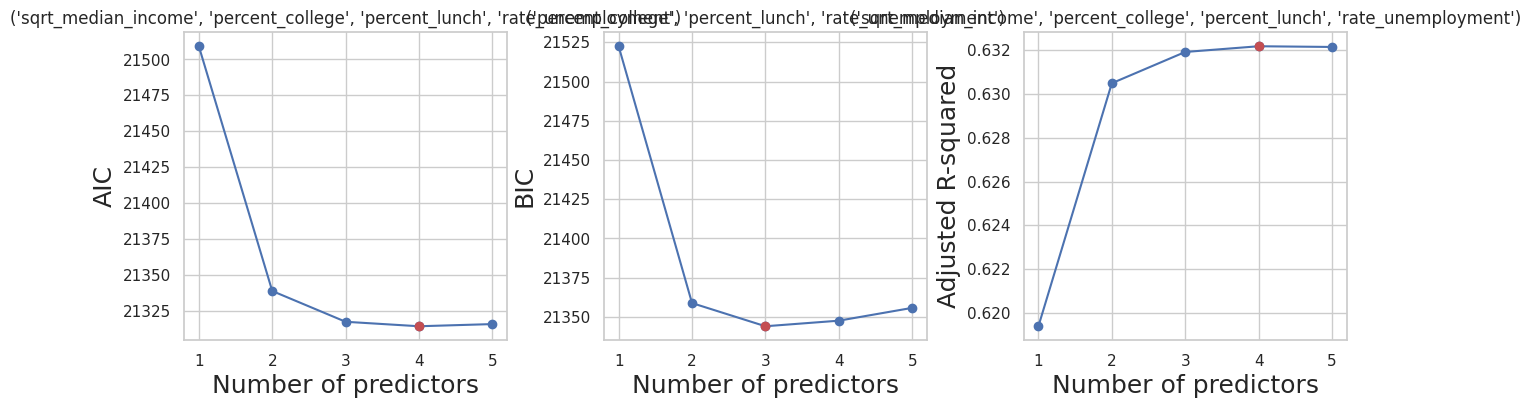

In [162]:
plot_best_subset_results(best_aic, best_bic, best_adjusted_rsquared, best_predictors)

## Graphs

In [163]:
'''
fig, axs = plt.subplots(ncols=2, nrows =2, figsize=(12,9))
sns.scatterplot(data = df_table, x = 'level', y = 'r-squared', ax = axs[0,0])

sns.scatterplot(data = df_table, x = 'level', y = 'aic', ax = axs[1,0])

sns.scatterplot(data = df_table, x = 'level', y = 'bic', ax = axs[0,1])
'''

"\nfig, axs = plt.subplots(ncols=2, nrows =2, figsize=(12,9))\nsns.scatterplot(data = df_table, x = 'level', y = 'r-squared', ax = axs[0,0])\n\nsns.scatterplot(data = df_table, x = 'level', y = 'aic', ax = axs[1,0])\n\nsns.scatterplot(data = df_table, x = 'level', y = 'bic', ax = axs[0,1])\n"

Text(0.5, 1.0, 'AIC vs. BIC')

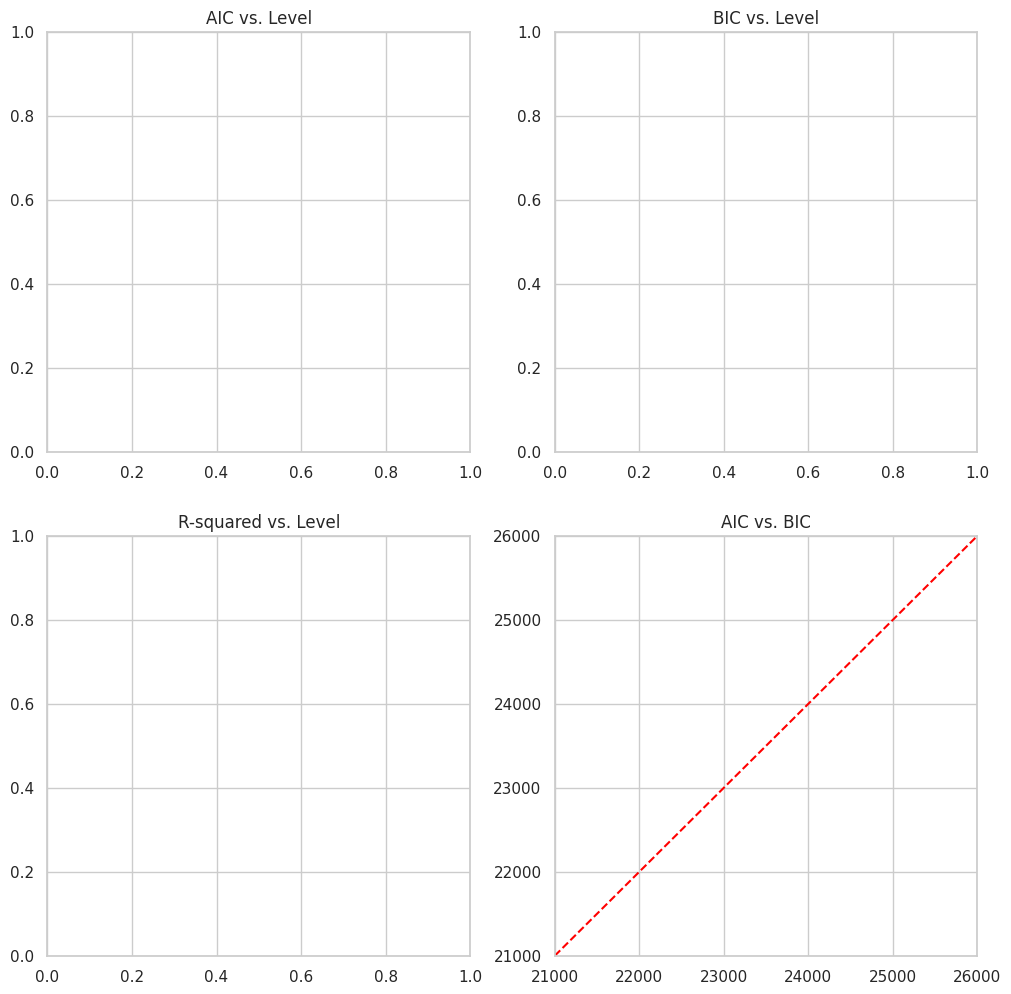

In [164]:
fig, axs = plt.subplots(ncols=2, nrows =2, figsize=(12, 12))
sns.scatterplot(data = df_table, x = 'level', y = 'aic', ax = axs[0,0])
sns.scatterplot(data = df_table, x = 'level', y = 'bic', ax = axs[0,1])
sns.scatterplot(data = df_table, x = 'level', y = 'r-squared', ax = axs[1,0])
sns.scatterplot(data = df_table, x = 'bic', y = 'aic', ax = axs[1,1])
xmin, xmax = plt.xlim(21000,26000)
ymin, ymax = plt.ylim(21000,26000)
min_val = min(xmin, ymin)
max_val = max(xmax, ymax)

sns.lineplot(x=[min_val, max_val], y=[min_val, max_val], color='red',linestyle = '--')


axs[0, 0].set_title('AIC vs. Level')
axs[0, 1].set_title('BIC vs. Level')
axs[1, 0].set_title('R-squared vs. Level')
axs[1, 1].set_title('AIC vs. BIC')

**Models without lunch_percentage**

In [165]:
all_models = best_subset(df_train_subset[['sqrt_median_income','percent_college','percent_lunch', 'percent_married', 'rate_unemployment']],df_train_subset['average_act'])

In [166]:
models_no_lunch_percent = best_subset(df_train_subset[['sqrt_median_income','percent_college', 'percent_married', 'rate_unemployment']],df_train_subset['average_act'])

In [167]:
# all_models['predictors'].isin(models_no_lunch_percent['predictors'])

In [168]:
all_models = pd.merge(all_models, models_no_lunch_percent, how='outer', indicator=True)

In [169]:
display(all_models)

level  \
0       1   
1       1   
2       1   
3       1   
4       1   
5       2   
6       2   
7       2   
8       2   
9       2   
10      2   
11      2   
12      2   
13      2   
14      2   
15      3   
16      3   
17      3   
18      3   
19      3   
20      3   
21      3   
22      3   
23      3   
24      3   
25      4   
26      4   
27      4   
28      4   
29      4   
30      5   

                                                                                    predictors  \
0                                                                           sqrt_median_income   
1                                                                              percent_college   
2                                                                                percent_lunch   
3                                                                              percent_married   
4                                                                            rate_unemployment   
5                                                         sqrt_median_income + percent_college   
6                                                           sqrt_median_income + percent_lunch   
7                                                         sqrt_median_income + percent_married   
8                                                       sqrt_median_income + rate_unemployment   
9                                                              percent_college + percent_lunch   
10                                                           percent_college + percent_married   
11                                                         percent_college + rate_unemployment   
12                                                             percent_lunch + percent_married   
13                                                           percent_lunch + rate_unemployment   
14                                                         percent_married + rate_unemployment   
15                                        sqrt_median_income + percent_college + percent_lunch   
16                                      sqrt_median_income + percent_college + percent_married   
17                                    sqrt_median_income + percent_college + rate_unemployment   
18                                        sqrt_median_income + percent_lunch + percent_married   
19                                      sqrt_median_income + percent_lunch + rate_unemployment   
20                                    sqrt_median_income + percent_married + rate_unemployment   
21                                           percent_college + percent_lunch + percent_married   
22                                         percent_college + percent_lunch + rate_unemployment   
23                                       percent_college + percent_married + rate_unemployment   
24                                         percent_lunch + percent_married + rate_unemployment   
25                      sqrt_median_income + percent_college + percent_lunch + percent_married   
26                    sqrt_median_income + percent_college + percent_lunch + rate_unemployment   
27                  sqrt_median_income + percent_college + percent_married + rate_unemployment   
28                    sqrt_median_income + percent_lunch + percent_married + rate_unemployment   
29                       percent_college + percent_lunch + percent_married + rate_unemployment   
30  sqrt_median_income + percent_college + percent_lunch + percent_married + rate_unemployment   

    r-squared           aic           bic     _merge  
0    0.223063  25635.259481  25648.584145       both  
1    0.208270  25744.292663  25757.617327       both  
2    0.619443  21509.223486  21522.548150  left_only  
3    0.195187  25839.040378  25852.365042       both  
4    0.190848  25870.128384  25883.453048       both  
5    0.251101  25424.774853  25444.761849       both  
6    0.623283  21452.593877  21472.580873  left_only  
7    0.251

In [170]:
models_with_lunch_percent = all_models.loc[all_models['_merge'] == 'left_only'].drop('_merge', axis = 1)

In [171]:
all_models = all_models.rename(columns={'_merge': 'percent_lunch'})
all_models.head()

level          predictors  r-squared           aic           bic  \
0      1  sqrt_median_income   0.223063  25635.259481  25648.584145   
1      1     percent_college   0.208270  25744.292663  25757.617327   
2      1       percent_lunch   0.619443  21509.223486  21522.548150   
3      1     percent_married   0.195187  25839.040378  25852.365042   
4      1   rate_unemployment   0.190848  25870.128384  25883.453048   

  percent_lunch  
0          both  
1          both  
2     left_only  
3          both  
4          both

In [172]:
all_models['percent_lunch'] = all_models['percent_lunch'].cat.add_categories(['included', 'not included'])
all_models.loc[all_models['percent_lunch'] == 'left_only', 'percent_lunch'] = 'included' 
all_models.loc[all_models['percent_lunch'] == 'both', 'percent_lunch'] = 'not included'
all_models['percent_lunch'] = all_models['percent_lunch'].cat.remove_categories(['left_only', 'right_only','both'])
display(all_models) 

level  \
0       1   
1       1   
2       1   
3       1   
4       1   
5       2   
6       2   
7       2   
8       2   
9       2   
10      2   
11      2   
12      2   
13      2   
14      2   
15      3   
16      3   
17      3   
18      3   
19      3   
20      3   
21      3   
22      3   
23      3   
24      3   
25      4   
26      4   
27      4   
28      4   
29      4   
30      5   

                                                                                    predictors  \
0                                                                           sqrt_median_income   
1                                                                              percent_college   
2                                                                                percent_lunch   
3                                                                              percent_married   
4                                                                            rate_unemployment   
5                                                         sqrt_median_income + percent_college   
6                                                           sqrt_median_income + percent_lunch   
7                                                         sqrt_median_income + percent_married   
8                                                       sqrt_median_income + rate_unemployment   
9                                                              percent_college + percent_lunch   
10                                                           percent_college + percent_married   
11                                                         percent_college + rate_unemployment   
12                                                             percent_lunch + percent_married   
13                                                           percent_lunch + rate_unemployment   
14                                                         percent_married + rate_unemployment   
15                                        sqrt_median_income + percent_college + percent_lunch   
16                                      sqrt_median_income + percent_college + percent_married   
17                                    sqrt_median_income + percent_college + rate_unemployment   
18                                        sqrt_median_income + percent_lunch + percent_married   
19                                      sqrt_median_income + percent_lunch + rate_unemployment   
20                                    sqrt_median_income + percent_married + rate_unemployment   
21                                           percent_college + percent_lunch + percent_married   
22                                         percent_college + percent_lunch + rate_unemployment   
23                                       percent_college + percent_married + rate_unemployment   
24                                         percent_lunch + percent_married + rate_unemployment   
25                      sqrt_median_income + percent_college + percent_lunch + percent_married   
26                    sqrt_median_income + percent_college + percent_lunch + rate_unemployment   
27                  sqrt_median_income + percent_college + percent_married + rate_unemployment   
28                    sqrt_median_income + percent_lunch + percent_married + rate_unemployment   
29                       percent_college + percent_lunch + percent_married + rate_unemployment   
30  sqrt_median_income + percent_college + percent_lunch + percent_married + rate_unemployment   

    r-squared           aic           bic percent_lunch  
0    0.223063  25635.259481  25648.584145  not included  
1    0.208270  25744.292663  25757.617327  not included  
2    0.619443  21509.223486  21522.548150      included  
3    0.195187  25839.040378  25852.365042  not included  
4    0.190848  25870.128384  25883.453048  not included  
5    0.251101  25424.774853  25444.761849  not included  
6    0.623283  21452.593877  21472.580873   

In [173]:
display(models_with_lunch_percent)

level  \
2       1   
6       2   
9       2   
12      2   
13      2   
15      3   
18      3   
19      3   
21      3   
22      3   
24      3   
25      4   
26      4   
28      4   
29      4   
30      5   

                                                                                    predictors  \
2                                                                                percent_lunch   
6                                                           sqrt_median_income + percent_lunch   
9                                                              percent_college + percent_lunch   
12                                                             percent_lunch + percent_married   
13                                                           percent_lunch + rate_unemployment   
15                                        sqrt_median_income + percent_college + percent_lunch   
18                                        sqrt_median_income + percent_lunch + percent_married   
19                                      sqrt_median_income + percent_lunch + rate_unemployment   
21                                           percent_college + percent_lunch + percent_married   
22                                         percent_college + percent_lunch + rate_unemployment   
24                                         percent_lunch + percent_married + rate_unemployment   
25                      sqrt_median_income + percent_college + percent_lunch + percent_married   
26                    sqrt_median_income + percent_college + percent_lunch + rate_unemployment   
28                    sqrt_median_income + percent_lunch + percent_married + rate_unemployment   
29                       percent_college + percent_lunch + percent_married + rate_unemployment   
30  sqrt_median_income + percent_college + percent_lunch + percent_married + rate_unemployment   

    r-squared           aic           bic  
2    0.619443  21509.223486  21522.548150  
6    0.623283  21452.593877  21472.580873  
9    0.630625  21338.807013  21358.794009  
12   0.621124  21485.625363  21505.612359  
13   0.623587  21447.932860  21467.919856  
15   0.630665  21340.183801  21366.833129  
18   0.623358  21453.448705  21480.098033  
19   0.625255  21424.252698  21450.902026  
21   0.630772  21338.512473  21365.161801  
22   0.632120  21317.376181  21344.025509  
24   0.623813  21446.453468  21473.102796  
25   0.630973  21337.361815  21370.673475  
26   0.632445  21314.262790  21347.574450  
28   0.625273  21425.982346  21459.294006  
29   0.632128  21319.247399  21352.559059  
30   0.632476  21315.771644  21355.745635

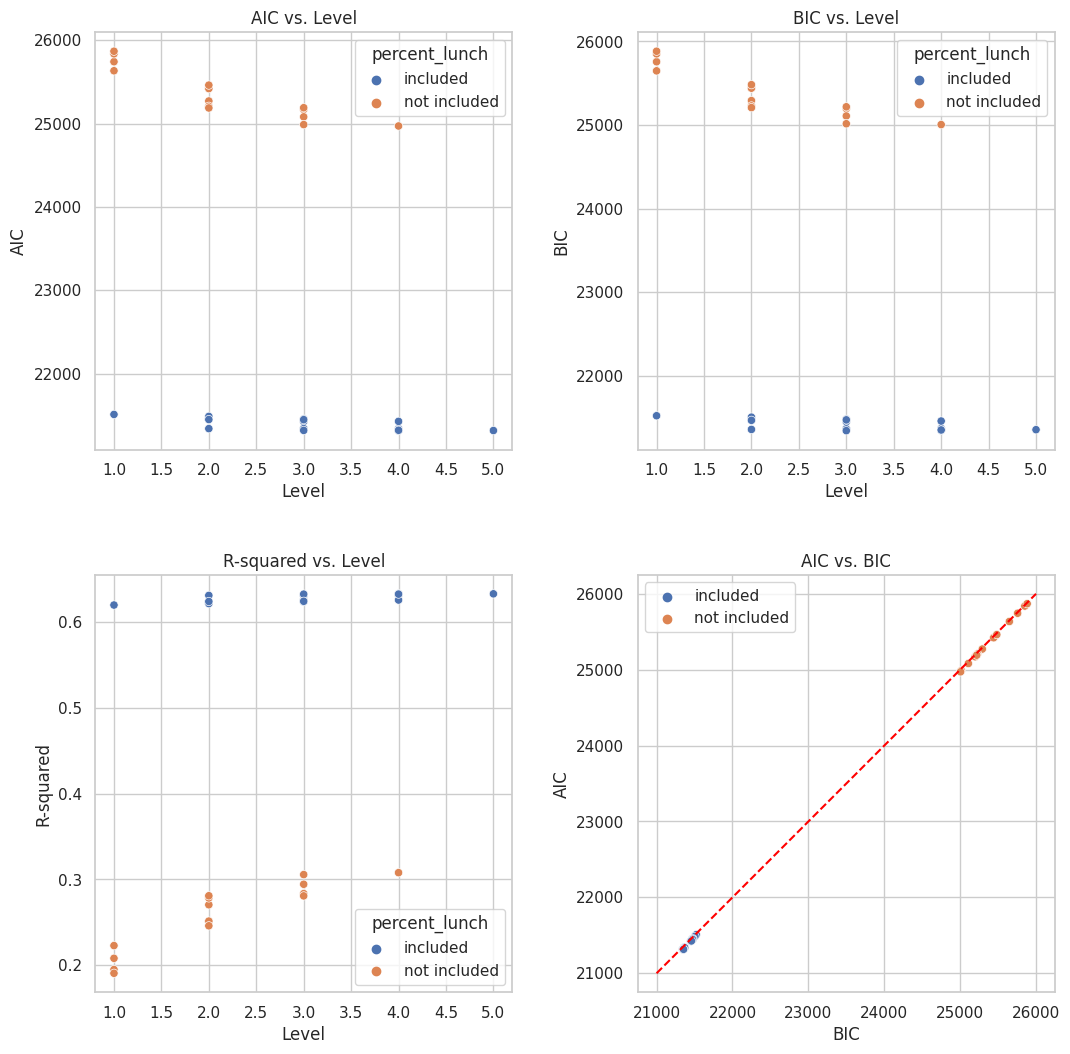

In [174]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

sns.scatterplot(data=all_models, x='level', y='aic', hue='percent_lunch', ax=axs[0, 0])
axs[0, 0].set_title('AIC vs. Level')
axs[0, 0].set_xlabel('Level')
axs[0, 0].set_ylabel('AIC')

sns.scatterplot(data=all_models, x='level', y='bic', hue='percent_lunch', ax=axs[0, 1])
axs[0, 1].set_title('BIC vs. Level')
axs[0, 1].set_xlabel('Level')
axs[0, 1].set_ylabel('BIC')

sns.scatterplot(data=all_models, x='level', y='r-squared', hue='percent_lunch', ax=axs[1, 0])
axs[1, 0].set_title('R-squared vs. Level')
axs[1, 0].set_xlabel('Level')
axs[1, 0].set_ylabel('R-squared')

sns.scatterplot(data=all_models, x='bic', y='aic', hue='percent_lunch', ax=axs[1, 1])
axs[1, 1].set_title('AIC vs. BIC')
axs[1, 1].set_xlabel('BIC')
axs[1, 1].set_ylabel('AIC')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
sns.lineplot(x=[min_val, max_val], y=[min_val, max_val], color='red', linestyle='--')

plt.show()


In [175]:
'''
fig, axs = plt.subplots(ncols=2, nrows =2, figsize=(12, 12))
sns.scatterplot(data = models_with_lunch_percent, x = 'level', y = 'aic', ax = axs[0,0])
sns.scatterplot(data = models_with_lunch_percent, x = 'level', y = 'bic', ax = axs[0,1])
sns.scatterplot(data = models_with_lunch_percent, x = 'level', y = 'r-squared', ax = axs[1,0])
sns.scatterplot(data = models_with_lunch_percent, x = 'bic', y = 'aic', ax = axs[1,1])

sns.scatterplot(data = models_no_lunch_percent, x = 'level', y = 'aic', ax = axs[0,0])
sns.scatterplot(data = models_no_lunch_percent, x = 'level', y = 'bic', ax = axs[0,1])
sns.scatterplot(data = models_no_lunch_percent, x = 'level', y = 'r-squared', ax = axs[1,0])
sns.scatterplot(data = models_no_lunch_percent, x = 'bic', y = 'aic', ax = axs[1,1])
xmin, xmax = plt.xlim(21000,26000)
ymin, ymax = plt.ylim(21000,26000)
min_val = min(xmin, ymin)
max_val = max(xmax, ymax)

sns.lineplot(x=[min_val, max_val], y=[min_val, max_val], color='red',linestyle = '--')


axs[0, 0].set_title('AIC vs. Level')
axs[0, 1].set_title('BIC vs. Level')
axs[1, 0].set_title('R-squared vs. Level')
axs[1, 1].set_title('AIC vs. BIC')
'''

"\nfig, axs = plt.subplots(ncols=2, nrows =2, figsize=(12, 12))\nsns.scatterplot(data = models_with_lunch_percent, x = 'level', y = 'aic', ax = axs[0,0])\nsns.scatterplot(data = models_with_lunch_percent, x = 'level', y = 'bic', ax = axs[0,1])\nsns.scatterplot(data = models_with_lunch_percent, x = 'level', y = 'r-squared', ax = axs[1,0])\nsns.scatterplot(data = models_with_lunch_percent, x = 'bic', y = 'aic', ax = axs[1,1])\n\nsns.scatterplot(data = models_no_lunch_percent, x = 'level', y = 'aic', ax = axs[0,0])\nsns.scatterplot(data = models_no_lunch_percent, x = 'level', y = 'bic', ax = axs[0,1])\nsns.scatterplot(data = models_no_lunch_percent, x = 'level', y = 'r-squared', ax = axs[1,0])\nsns.scatterplot(data = models_no_lunch_percent, x = 'bic', y = 'aic', ax = axs[1,1])\nxmin, xmax = plt.xlim(21000,26000)\nymin, ymax = plt.ylim(21000,26000)\nmin_val = min(xmin, ymin)\nmax_val = max(xmax, ymax)\n\nsns.lineplot(x=[min_val, max_val], y=[min_val, max_val], color='red',linestyle = '--'

In [176]:
'''
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

axs[0, 0].scatter(models_with_lunch_percent['level'], models_with_lunch_percent['aic'])
axs[0, 1].scatter(models_with_lunch_percent['level'], models_with_lunch_percent['bic'])
axs[1, 0].scatter(models_with_lunch_percent['level'], models_with_lunch_percent['r-squared'])
axs[1, 1].scatter(models_with_lunch_percent['bic'], models_with_lunch_percent['aic'])

axs[0, 0].scatter(models_no_lunch_percent['level'], models_no_lunch_percent['aic'])
axs[0, 1].scatter(models_no_lunch_percent['level'], models_no_lunch_percent['bic'])
axs[1, 0].scatter(models_no_lunch_percent['level'], models_no_lunch_percent['r-squared'])
axs[1, 1].scatter(models_no_lunch_percent['bic'], models_no_lunch_percent['aic'])

axs[1, 1].plot([21000, 26000], [21000, 26000], color='red', linestyle='--')

axs[0, 0].set_title('AIC vs. Level')
axs[0, 1].set_title('BIC vs. Level')
axs[1, 0].set_title('R-squared vs. Level')
axs[1, 1].set_title('AIC vs. BIC')

plt.show()
'''

"\nfig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))\n\naxs[0, 0].scatter(models_with_lunch_percent['level'], models_with_lunch_percent['aic'])\naxs[0, 1].scatter(models_with_lunch_percent['level'], models_with_lunch_percent['bic'])\naxs[1, 0].scatter(models_with_lunch_percent['level'], models_with_lunch_percent['r-squared'])\naxs[1, 1].scatter(models_with_lunch_percent['bic'], models_with_lunch_percent['aic'])\n\naxs[0, 0].scatter(models_no_lunch_percent['level'], models_no_lunch_percent['aic'])\naxs[0, 1].scatter(models_no_lunch_percent['level'], models_no_lunch_percent['bic'])\naxs[1, 0].scatter(models_no_lunch_percent['level'], models_no_lunch_percent['r-squared'])\naxs[1, 1].scatter(models_no_lunch_percent['bic'], models_no_lunch_percent['aic'])\n\naxs[1, 1].plot([21000, 26000], [21000, 26000], color='red', linestyle='--')\n\naxs[0, 0].set_title('AIC vs. Level')\naxs[0, 1].set_title('BIC vs. Level')\naxs[1, 0].set_title('R-squared vs. Level')\naxs[1, 1].set_title('AIC vs

## Graph ACT vs variables

In [177]:
'''
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

sns.scatterplot(data=all_models, x='sqrt_median_income', y='aic', ax=axs[0, 0])
sns.scatterplot(data=all_models, x='percent_college', y='aic', ax=axs[0, 1])
sns.scatterplot(data=all_models, x='percent_lunch', y='aic', ax=axs[1, 0])
sns.scatterplot(data=all_models, x='percent_married', y='aic', ax=axs[1, 1])

'''

"\nfig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))\n\nsns.scatterplot(data=all_models, x='sqrt_median_income', y='aic', ax=axs[0, 0])\nsns.scatterplot(data=all_models, x='percent_college', y='aic', ax=axs[0, 1])\nsns.scatterplot(data=all_models, x='percent_lunch', y='aic', ax=axs[1, 0])\nsns.scatterplot(data=all_models, x='percent_married', y='aic', ax=axs[1, 1])\n\n"

Iterate through 1 to length of data

Fit full model
Fit single predictor
Models
Write python code for best subset selection


Best subset - Class

# Dummy variable

In [178]:
df_required = pd.read_csv('https://raw.githubusercontent.com/Mariana-MarquezA/Education-Inequality/main/dummy_requirement_csv.csv')

In [179]:
df_required


state  required_yes
0     DE             1
1     FL             0
2     GA             0
3     IL             0
4     IN             0
5     KY             1
6     LA             1
7     MA             0
8     MI             1
9     MO             1
10    NJ             0
11    NY             0
12    NC             1
13    OH             1
14    PA             0
15    TN             1
16    TX             0
17    WA             0
18    WI             1
19    WY             1

In [180]:
df_train_merged = pd.merge(df_required, df_train, on='state')

In [181]:
df_test_merged = pd.merge(df_required, df_test, on='state')

In [182]:
df_train_merged.head()

state  required_yes  median_income  percent_college  percent_lunch  \
0    DE             1        50649.0         0.673492       0.425118   
1    DE             1        51103.0         0.503243       0.280992   
2    DE             1       105708.0         0.856205       0.299448   
3    DE             1        59500.0         0.415672       0.447068   
4    DE             1        46644.0         0.465487       0.304396   

   percent_married  rate_unemployment school_level     school_type       year  \
0         0.483333           0.080120         High  Regular School  2016-2017   
1         0.535479           0.102545         High  Regular School  2016-2017   
2         0.960784           0.061728         High  Regular School  2016-2017   
3         0.618327           0.053313         High  Regular School  2016-2017   
4         0.513728           0.107710         High  Regular School  2016-2017   

  zip_code  average_act  log_median_income  sqrt_median_income  \
0    19904    17.034188          10.832675          225.053327   
1    19977    17.026862          10.841598          226.059727   
2    19803    17.969475          11.568436          325.127667   
3    19947    16.072039          10.993732          243.926218   
4    19945    18.008547          10.750300          215.972220   

   exp_rate_unemployment  sqrt_rate_unemployment  
0               1.083417                0.283055  
1               1.107987                0.320226  
2               1.063673                0.248452  
3               1.054759                0.230895  
4               1.113725                0.328192

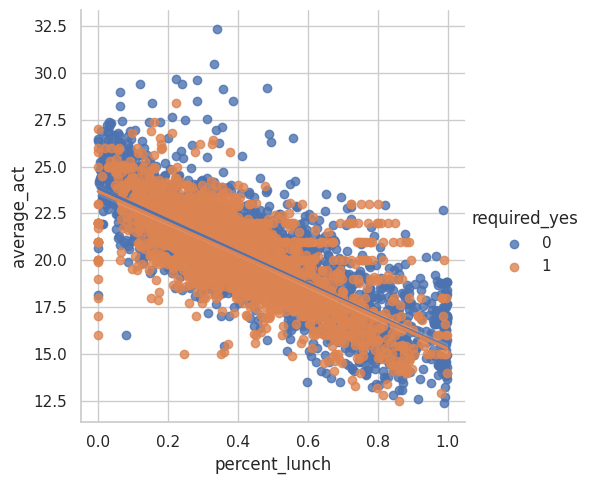

In [183]:
sns.lmplot(x="percent_lunch", y="average_act", hue="required_yes", data=df_train_merged)

In [184]:
model0 = smf.ols('average_act ~ percent_college + rate_unemployment + percent_lunch', data= df_train_merged).fit()

In [185]:
model1 = smf.ols('average_act ~ percent_college + rate_unemployment + percent_lunch + required_yes', data= df_train_merged).fit()

In [186]:
model2 = smf.ols('average_act ~ percent_college + rate_unemployment + percent_lunch + required_yes + percent_lunch*required_yes', data= df_train_merged).fit()

In [187]:
models = [model0,model1,model2]

In [188]:
X_test = df_test_merged[['percent_college', 'rate_unemployment', 'percent_lunch', 'required_yes']]
y_test = df_test_merged['average_act']

In [189]:
def test_models(models, X_test, y_test):
    results = []
    for i, model in enumerate(models):
        y_pred = model.predict(X_test)
        accuracy = r2_score(y_test, y_pred)
        formula = model.model.formula
        results.append({'model': f'model {i}', 'accuracy': accuracy, 'formula': formula}) 

    return pd.DataFrame(results)


In [190]:
test_models(models, X_test, y_test)

model  accuracy  \
0  model 0  0.609675   
1  model 1  0.610016   
2  model 2  0.610189   

                                                                                                         formula  
0                                              average_act ~ percent_college + rate_unemployment + percent_lunch  
1                               average_act ~ percent_college + rate_unemployment + percent_lunch + required_yes  
2  average_act ~ percent_college + rate_unemployment + percent_lunch + required_yes + percent_lunch*required_yes

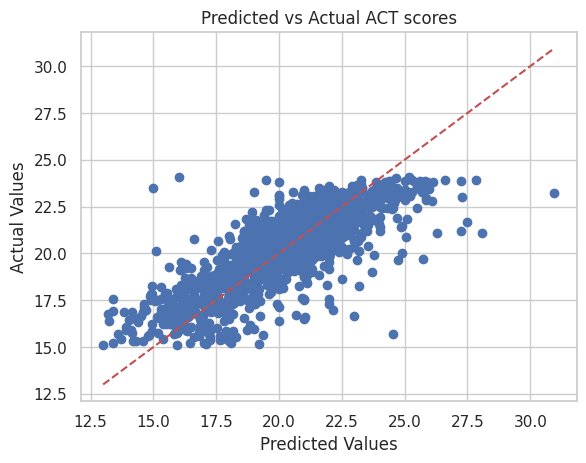

In [191]:
y_pred = model1.predict(X_test)

# Plot expected vs real values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual ACT scores')
plt.show()


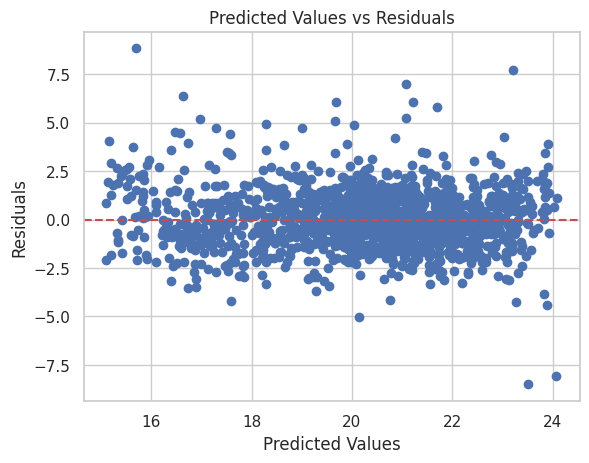

In [192]:
residuals = y_test - y_pred

# Plot predicted values vs residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.show()

In [195]:
from IPython.display import HTML

HTML("<div class='tableauPlaceholder' id='viz1683610619242' style='position: relative'><noscript><a href='#'><img alt='Average ACT scores per school in selected states ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ma&#47;map_education&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='map_education&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ma&#47;map_education&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div> <script type='text/javascript'> var divElement = document.getElementById('viz1683610619242'); var vizElement = divElement.getElementsByTagName('object')[0]; vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px'; var scriptElement = document.createElement('script'); scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js'; vizElement.parentNode.insertBefore(scriptElement, vizElement); </script>")


Text(0, 0.5, 'Standardized Residuals')

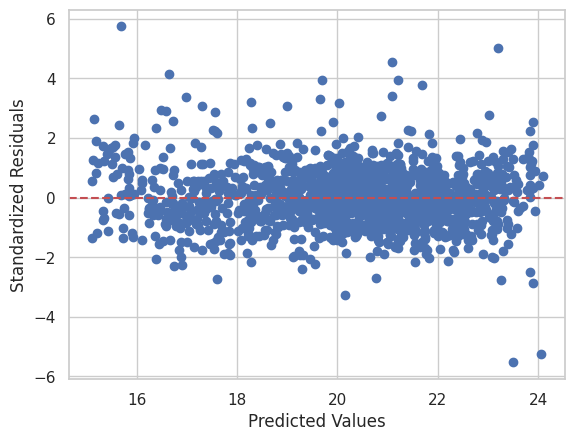

In [196]:
residuals = y_test - y_pred
std_residuals = residuals / np.std(residuals)

# Create the scatter plot
plt.scatter(y_pred, std_residuals)

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Add x and y axis labels
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")

Understimating.

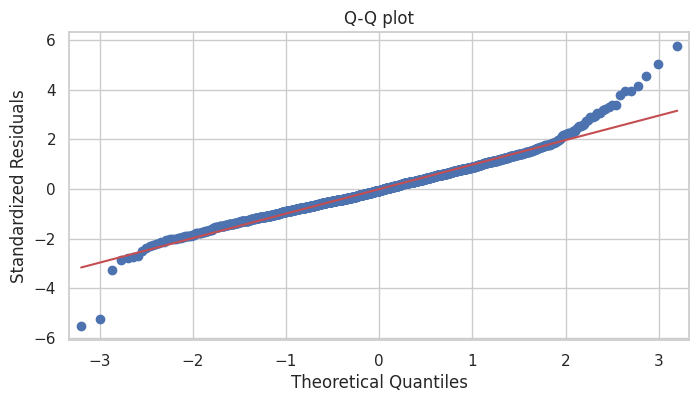

In [197]:
residuals = model1.resid

fig, ax = plt.subplots(figsize=(8, 4))
sm.qqplot(std_residuals, line='r', ax=ax)
ax.set_title("Q-Q plot")
plt.ylabel("Standardized Residuals")
plt.show()

Extreme values

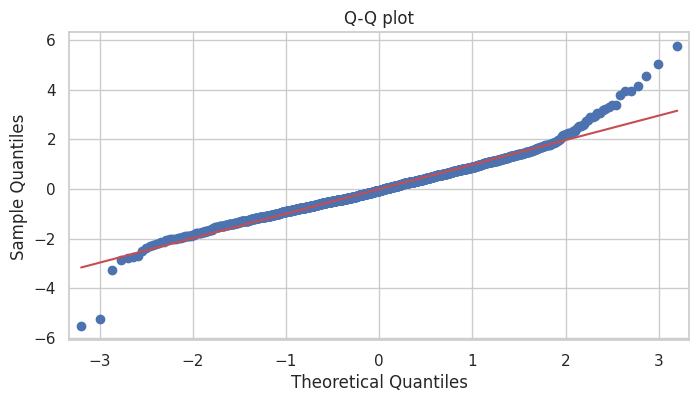

In [198]:
residuals = y_test - y_pred
std_residuals = residuals / np.std(residuals)

# Create a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 4))
sm.qqplot(std_residuals , line='r', ax=ax)
ax.set_title("Q-Q plot")
plt.show()

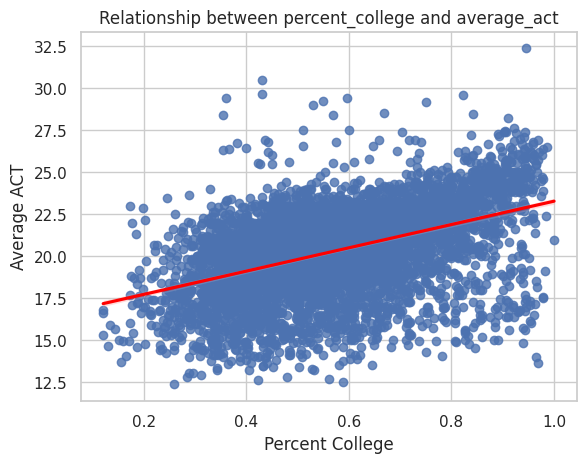

In [199]:
sns.regplot(x='percent_college', y='average_act', data=df_train_merged, line_kws={'color': 'red'})
plt.title('Relationship between percent_college and average_act')
plt.xlabel('Percent College')
plt.ylabel('Average ACT')
plt.show()

# plot the regression lines with hue as the color variable
#sns.lmplot(x="percent_lunch", y="average_act", hue="required_yes", data=df_merged, palette='colorblind',
#           line_kws={'lw': 2},
#           scatter_kws={'s': 50, 'alpha': 0.7})


In [200]:
result_r2

model num_var  \
0     3       1   
1    10       2   
2    23       3   
3    27       4   
4    31       5   

                                                                                   predictors  \
0                                                                               percent_lunch   
1                                                             percent_college + percent_lunch   
2                                         percent_college + percent_lunch + rate_unemployment   
3                    sqrt_median_income + percent_college + percent_lunch + rate_unemployment   
4  sqrt_median_income + percent_college + percent_lunch + percent_married + rate_unemployment   

  r-squared adj. r-squared       aic       bic  criterion  
0  0.619443        0.61938  21509.22  21522.55  r-squared  
1  0.630625         0.6305  21338.81  21358.79  r-squared  
2   0.63212        0.63193  21317.38  21344.03  r-squared  
3  0.632445        0.63219  21314.26  21347.57  r-squared  
4  0.632476        0.63216  21315.77  21355.75  r-squared

In [201]:
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            average_act   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1363.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          4.30e-268
Time:                        06:20:36   Log-Likelihood:                -12933.
No. Observations:                5781   AIC:                         2.587e+04
Df Residuals:                    5779   BIC:                         2.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.1765      0.059    378.554      0.000      22.062      22.291
rate_unemployment   -19.3882      0.525    -36.919      0.000     -20.418     -18.359
==============================================================================
Omnibus:                      115.817   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.808
Skew:                           0.066   Prob(JB):                     8.44e-53
Kurtosis:                       3.989   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
display(model.summary())

Are educational opportunity outcomes in HS associated with area socioeconomic factor? 

Yes. 

*   Strong relationship between %lunch and ACT
*   high R2 -> accuracy
*   significant coefficients
*   Measure of accuracy in ACT units
*   How much can we predict


How?
*   %lunch
*   List item









Are ACT and SAT scores in HS associated with area socioeconomic factors?

How do the area socioeconomic factors predict ACT/SAT scores?

# Evaluation and limitations
*   State by state basis
*   Missing predictors
*   Missing states
*   Limited data in some states
*   SAT changed in 2016
*   Orginal data measure kids attending schools and adults in the area 
*   No direct measurment of people going to the school
*   Cut-off income by school
*   Quality control of data
 




